In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['all.csv']


In [2]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from spacy.lang.en import English
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./input/all.csv")

In [4]:
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [5]:
author_list = df['author'].tolist()

author_list[0:5]

In [6]:
sentences1 = df['content'].tolist()

In [7]:
df['content']

0      Let the bird of loudest lay\r\nOn the sole Ara...
1      Sir Charles into my chamber coming in,\r\nWhen...
2      Our vice runs beyond all that old men saw,\r\n...
3      Lo I the man, whose Muse whilome did maske,\r\...
4      Long have I longd to see my love againe,\r\nSt...
                             ...                        
568    With the man I love who loves me not,\r\nI wal...
569    Hart Crane, "Voyages I, II, III, IV, V, VI" fr...
570    When you are old and grey and full of sleep,\r...
571    Give me hunger,\r\nO you gods that sit and giv...
572    Potuia, potuia\r\nWhite grave goddess,\r\nPity...
Name: content, Length: 573, dtype: object

In [8]:
sentences2 = list()
for element in sentences1:
    element = element.replace("\n"," ")
    element = element.replace("\r","")
    element = element.replace(",","")
    element = element.replace(".","")
    element = element.replace(";","")
    element = element.replace(":","")
    element = element.replace("?","")
    element = element.replace("!","")
    sentences2.append(element)

In [9]:
sent_list = []
for i in range (len(sentences2)):
    str1 = sentences2[i].split(" ")
    sent_list.append(str1)
print(sent_list[0])

['Let', 'the', 'bird', 'of', 'loudest', 'lay', 'On', 'the', 'sole', 'Arabian', 'tree', 'Herald', 'sad', 'and', 'trumpet', 'be', 'To', 'whose', 'sound', 'chaste', 'wings', 'obey', '', 'But', 'thou', 'shrieking', 'harbinger', 'Foul', 'precurrer', 'of', 'the', 'fiend', 'Augur', 'of', 'the', "fever's", 'end', 'To', 'this', 'troop', 'come', 'thou', 'not', 'near', '', 'From', 'this', 'session', 'interdict', 'Every', 'fowl', 'of', 'tyrant', 'wing', 'Save', 'the', 'eagle', "feather'd", 'king', 'Keep', 'the', 'obsequy', 'so', 'strict', '', 'Let', 'the', 'priest', 'in', 'surplice', 'white', 'That', 'defunctive', 'music', 'can', 'Be', 'the', 'death-divining', 'swan', 'Lest', 'the', 'requiem', 'lack', 'his', 'right', '', 'And', 'thou', 'treble-dated', 'crow', 'That', 'thy', 'sable', 'gender', "mak'st", 'With', 'the', 'breath', 'thou', "giv'st", 'and', "tak'st", "'Mongst", 'our', 'mourners', 'shalt', 'thou', 'go', '', 'Here', 'the', 'anthem', 'doth', 'commence', 'Love', 'and', 'constancy', 'is', 'd

In [10]:
print(len(sent_list))
print(len(author_list))

573
573


In [11]:
#Removing the blank spaces
b = list()
for mylist in sent_list:
    temp = list()
    for word in mylist:
        if word is not "":
            temp.append(word)
    b.append(temp)
sent_list = b

In [12]:
Nouns = 0
Verbs = 0
Adjectives = 0
noun_count = []
verb_count = []
adjective_count = []

for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        print(sent_list[i][j])
        word = nlp(sent_list[i][j])
        for token in word:
            if token.pos_ == 'VERB':
                Verbs= Verbs + 1
            elif token.pos_ == 'NOUN':
                Nouns= Nouns + 1
            elif token.pos_ == 'ADJ':
                Adjectives= Adjectives + 1
    noun_count.append(Nouns)
    verb_count.append(Verbs)
    adjective_count.append(Adjectives)
Nouns = 0
Verbs = 0
Adjective = 0
            

Let
the
bird
of
loudest
lay
On
the
sole
Arabian
tree
Herald
sad
and
trumpet
be
To
whose
sound
chaste
wings
obey
But
thou
shrieking
harbinger
Foul
precurrer
of
the
fiend
Augur
of
the
fever's
end
To
this
troop
come
thou
not
near
From
this
session
interdict
Every
fowl
of
tyrant
wing
Save
the
eagle
feather'd
king
Keep
the
obsequy
so
strict
Let
the
priest
in
surplice
white
That
defunctive
music
can
Be
the
death-divining
swan
Lest
the
requiem
lack
his
right
And
thou
treble-dated
crow
That
thy
sable
gender
mak'st
With
the
breath
thou
giv'st
and
tak'st
'Mongst
our
mourners
shalt
thou
go
Here
the
anthem
doth
commence
Love
and
constancy
is
dead
Phoenix
and
the
Turtle
fled
In
a
mutual
flame
from
hence
So
they
lov'd
as
love
in
twain
Had
the
essence
but
in
one
Two
distincts
division
none
Number
there
in
love
was
slain
Hearts
remote
yet
not
asunder
Distance
and
no
space
was
seen
'Twixt
this
Turtle
and
his
queen
But
in
them
it
were
a
wonder
So
between
them
love
did
shine
That
the
Turtle
saw
his
right

doubt
their
wits
be
not
their
owne
So
many
pathes
so
many
turnings
seene
That
which
of
them
to
take
in
diverse
doubt
they
been
xi
At
last
resolving
forward
still
to
fare
Till
that
some
end
they
finde
or
in
or
out
That
path
they
take
that
beaten
seemd
most
bare
And
like
to
lead
the
labyrinth
about
Which
when
by
tract
they
hunted
had
throughout
At
length
it
brought
them
to
a
hollow
cave
Amid
the
thickest
woods
The
Champion
stout
Eftsoones
dismounted
from
his
courser
brave
And
to
the
Dwarfe
a
while
his
needlesse
spere
he
gave
xii
Be
well
aware
quoth
then
that
Ladie
milde
Least
suddaine
mischiefe
ye
too
rash
provoke
The
danger
hid
the
place
unknowne
and
wilde
Breeds
dreadfull
doubts
Oft
fire
is
without
smoke
And
perill
without
show
therefore
your
stroke
Sir
knight
with-hold
till
further
triall
made
Ah
Ladie
(said
he)
shame
were
to
revoke
The
forward
footing
for
an
hidden
shade
Vertue
gives
her
selfe
light
through
darkenesse
for
to
wade
xiii
Yea
but
(quoth
she)
the
perill
of
this
place
I
be

that
wicked
wight
his
dayes
doth
weare
For
to
all
knighthood
it
is
foule
disgrace
That
such
a
cursed
creature
lives
so
long
a
space
xxxii
Far
hence
(quoth
he)
in
wastfull
wildernesse
His
dwelling
is
by
which
no
living
wight
May
ever
passe
but
thorough
great
distresse
Now
(sayd
the
Lady)
draweth
toward
night
And
well
I
wote
that
of
your
later
fight
Ye
all
forwearied
be
for
what
so
strong
But
wanting
rest
will
also
want
of
might
The
Sunne
that
measures
heaven
all
day
long
At
night
doth
baite
his
steedes
the
Ocean
waves
emong
xxxiii
Then
with
the
Sunne
take
Sir
your
timely
rest
And
with
new
day
new
worke
at
once
begin
Untroubled
night
they
say
gives
counsell
best
Right
well
Sir
knight
ye
have
advised
bin
(Quoth
then
that
aged
man)
the
way
to
win
Is
wisely
to
advise
now
day
is
spent
Therefore
with
me
ye
may
take
up
your
In
For
this
same
night
The
knight
was
well
content
So
with
that
godly
father
to
his
home
they
went
xxxiv
A
little
lowly
Hermitage
it
was
Downe
in
a
dale
hard
by
a
forests
s

long
teares
Why
Dame
(quoth
he)
what
hath
ye
thus
dismayd
What
frayes
ye
that
were
wont
to
comfort
me
affrayd
liii
Love
of
your
selfe
she
said
and
deare
constraint
Lets
me
not
sleepe
but
wast
the
wearie
night
In
secret
anguish
and
unpittied
plaint
Whiles
you
in
carelesse
sleepe
are
drowned
quight
Her
doubtfull
words
made
that
redoubted
knight
Suspect
her
truth
yet
since
no'untruth
he
knew
Her
fawning
love
with
foule
disdainefull
spight
He
would
not
shend
but
said
Deare
dame
I
rew
That
for
my
sake
unknowne
such
griefe
unto
you
grew
liv
Assure
your
selfe
it
fell
not
all
to
ground
For
all
so
deare
as
life
is
to
my
hart
I
deeme
your
love
and
hold
me
to
you
bound
Ne
let
vaine
feares
procure
your
needlesse
smart
Where
cause
is
none
but
to
your
rest
depart
Not
all
content
yet
seemd
she
to
appease
Her
mournefull
plaintes
beguiled
of
her
art
And
fed
with
words
that
could
not
chuse
but
please
So
slyding
softly
forth
she
turnd
as
to
her
ease
lv
Long
after
lay
he
musing
at
her
mood
Much
griev'd
to

the
same
of
any
be
envide
So
Orpheus
did
for
his
owne
bride
So
I
unto
my
selfe
alone
will
sing
The
woods
shall
to
me
answer
and
my
Eccho
ring
Early
before
the
worlds
light
giving
lampe
His
golden
beame
upon
the
hils
doth
spred
Having
disperst
the
nights
unchearefull
dampe
Doe
ye
awake
and
with
fresh
lusty
hed
Go
to
the
bowre
of
my
beloved
love
My
truest
turtle
dove
Bid
her
awake
for
Hymen
is
awake
And
long
since
ready
forth
his
maske
to
move
With
his
bright
Tead
that
flames
with
many
a
flake
And
many
a
bachelor
to
waite
on
him
In
theyr
fresh
garments
trim
Bid
her
awake
therefore
and
soone
her
dight
For
lo
the
wished
day
is
come
at
last
That
shall
for
al
the
paynes
and
sorrowes
past
Pay
to
her
usury
of
long
delight
And
whylest
she
doth
her
dight
Doe
ye
to
her
of
joy
and
solace
sing
That
all
the
woods
may
answer
and
your
eccho
ring
Bring
with
you
all
the
Nymphes
that
you
can
heare
Both
of
the
rivers
and
the
forrests
greene
And
of
the
sea
that
neighbours
to
her
neare
Al
with
gay
girlands


vermill
stayne
Like
crimsin
dyde
in
grayne
That
even
th'Angels
which
continually
About
the
sacred
Altare
doe
remaine
Forget
their
service
and
about
her
fly
Ofte
peeping
in
her
face
that
seemes
more
fayre
The
more
they
on
it
stare
But
her
sad
eyes
still
fastened
on
the
ground
Are
governed
with
goodly
modesty
That
suffers
not
one
looke
to
glaunce
awry
Which
may
let
in
a
little
thought
unsownd
Why
blush
ye
love
to
give
to
me
your
hand
The
pledge
of
all
our
band
Sing
ye
sweet
Angels
Alleluya
sing
That
all
the
woods
may
answere
and
your
eccho
ring
Now
al
is
done
bring
home
the
bride
againe
Bring
home
the
triumph
of
our
victory
Bring
home
with
you
the
glory
of
her
gaine
With
joyance
bring
her
and
with
jollity
Never
had
man
more
joyfull
day
then
this
Whom
heaven
would
heape
with
blis
Make
feast
therefore
now
all
this
live
long
day
This
day
for
ever
to
me
holy
is
Poure
out
the
wine
without
restraint
or
stay
Poure
not
by
cups
but
by
the
belly
full
Poure
out
to
all
that
wull
And
sprinkle
all
the

time
an
endlesse
moniment
On
Hellespont
guilty
of
true
love's
blood
In
view
and
opposite
two
cities
stood
Sea-borderers
disjoin'd
by
Neptune's
might
The
one
Abydos
the
other
Sestos
hight
At
Sestos
Hero
dwelt
Hero
the
fair
Whom
young
Apollo
courted
for
her
hair
And
offer'd
as
a
dower
his
burning
throne
Where
she
could
sit
for
men
to
gaze
upon
The
outside
of
her
garments
were
of
lawn
The
lining
purple
silk
with
gilt
stars
drawn
Her
wide
sleeves
green
and
border'd
with
a
grove
Where
Venus
in
her
naked
glory
strove
To
please
the
careless
and
disdainful
eyes
Of
proud
Adonis
that
before
her
lies
Her
kirtle
blue
whereon
was
many
a
stain
Made
with
the
blood
of
wretched
lovers
slain
Upon
her
head
she
ware
a
myrtle
wreath
From
whence
her
veil
reach'd
to
the
ground
beneath
Her
veil
was
artificial
flowers
and
leaves
Whose
workmanship
both
man
and
beast
deceives
Many
would
praise
the
sweet
smell
as
she
past
When
'twas
the
odour
which
her
breath
forth
cast
And
there
for
honey
bees
have
sought
in
vai

to
laugh
to
lie
To
face
to
forge
to
scoff
to
company
To
crouch
to
please
to
be
a
beetle-stock
Of
thy
great
master's
will
to
scorn
or
mock
So
may'st
thou
chance
mock
out
a
benefice
Unless
thou
canst
one
conjure
by
device
Or
cast
a
figure
for
a
bishopric
And
if
one
could
it
were
but
a
school
trick
These
be
the
ways
by
which
without
reward
Livings
in
court
be
gotten
though
full
hard
For
nothing
there
is
done
without
a
fee
The
courtier
needs
must
recompensed
be
With
a
benevolence
or
have
in
gage
The
primitias
of
your
parsonage
Scarce
can
a
bishopric
forpass
them
by
But
that
it
must
be
gelt
in
privity
Do
not
thou
therefore
seek
a
living
there
But
of
more
private
persons
seek
elsewhere
Whereas
thou
may'st
compound
a
better
penny
Ne
let
thy
learning
question'd
be
of
any
For
some
good
gentleman
that
hath
the
right
Unto
his
church
for
to
present
a
wight
Will
cope
with
thee
in
reasonable
wise
That
if
the
living
yearly
do
arise
To
forty
pound
that
then
his
youngest
son
Shall
twenty
have
and
twent

Sweet
Thames
run
softly
till
I
end
my
song
Yet
therein
now
doth
lodge
a
noble
peer
Great
England's
glory
and
the
world's
wide
wonder
Whose
dreadful
name
late
through
all
Spain
did
thunder
And
Hercules'
two
pillars
standing
near
Did
make
to
quake
and
fear
Fair
branch
of
honour
flower
of
chivalry
That
fillest
England
with
thy
triumph's
fame
Joy
have
thou
of
thy
noble
victory
And
endless
happiness
of
thine
own
name
That
promiseth
the
same
That
through
thy
prowess
and
victorious
arms
Thy
country
may
be
freed
from
foreign
harms
And
great
Elisa's
glorious
name
may
ring
Through
all
the
world
filled
with
thy
wide
alarms
Which
some
brave
Muse
may
sing
To
ages
following
Upon
the
bridal
day
which
is
not
long
Sweet
Thames
run
softly
till
I
end
my
song
From
those
high
towers
this
noble
lord
issuing
Like
radiant
Hesper
when
his
golden
hair
In
th'Ocean
billows
he
hath
bathed
fair
Descended
to
the
river's
open
viewing
With
a
great
train
ensuing
Above
the
rest
were
goodly
to
be
seen
Two
gentle
knights


to
sette
thy
notes
in
frame
O
how
the
rurall
routes
to
thee
doe
cleave
Seemeth
thou
dost
their
soule
of
sence
bereave
All
as
the
shepheard
that
did
fetch
his
dame
From
Plutoes
balefull
bowre
withouten
leave
His
musicks
might
the
hellish
hound
did
tame
CUDDIE
So
praysen
babes
the
Peacoks
spotted
traine
And
wondren
at
bright
Argus
blazing
eye
But
who
rewards
him
ere
the
more
for
thy
Or
feedes
him
once
the
fuller
by
a
graine
Sike
prayse
is
smoke
that
sheddeth
in
the
skye
Sike
words
bene
wynd
and
wasten
soone
in
vayne
PIERS
Abandon
then
the
base
and
viler
clowne
Lyft
up
thy
selfe
out
of
the
lowly
dust
And
sing
of
bloody
Mars
of
wars
of
giusts
Turne
thee
to
those
that
weld
the
awful
crowne
To
doubted
Knights
whose
woundlesse
armour
rusts
And
helmes
unbruzed
wexen
dayly
browne
There
may
thy
Muse
display
her
fluttryng
wing
And
stretch
her
selfe
at
large
from
East
to
West
Whither
thou
list
in
fayre
Elisa
rest
Or
if
thee
please
in
bigger
notes
to
sing
Advaunce
the
worthy
whome
shee
loveth
best


night
becoming
sorrow
best
Light
leave
thy
light
fitt
for
a
lightsome
soule
Darknes
doth
truly
sure
with
mee
oprest
Whom
absence
power
doth
from
mirthe
controle
The
very
trees
with
hanging
heads
condole
Sweet
sommers
parting
and
of
leaves
distrest
In
dying
coulers
make
a
griefe-full
role
Soe
much
(alas)
to
sorrow
are
they
prest
Thus
of
dead
leaves
her
farewell
carpetts
made
Theyr
fall
theyr
branches
all
theyr
mournings
prove
With
leavles
naked
bodies
whose
huese
vade
From
hopefull
greene
to
wither
in
theyr
love
If
trees
and
leaves
for
absence
mourners
bee
Noe
mervaile
that
I
grieve
who
like
want
see
Januarie
gloga
prima
ARGVMENT
IN
this
fyrst
glogue
Colin
clout
a
shepheardes
boy
complaineth
him
of
his
vnfortunate
loue
being
but
newly
(as
semeth)
enamoured
of
a
countrie
lasse
called
Rosalinde
with
which
strong
affection
being
very
sore
traueled
he
compareth
his
carefull
case
to
the
sadde
season
of
the
yeare
to
the
frostie
ground
to
the
frosen
trees
and
to
his
owne
winterbeaten
flocke
An

a
bait
of
bitter
gall
To
drink
a
draught
of
sour
ale
(some
season)
To
eat
brown
bread
with
homely
hands
in
hall
Doth
much
increase
mens
appetites
by
reason
And
makes
the
sweet
more
sugard
that
ensues
Since
minds
of
men
do
still
seek
after
news
The
pamperd
horse
is
seldom
seen
in
breath
Whose
manger
makes
his
grace
(oftimes)
to
melt
The
crammed
fowl
comes
quickly
to
his
death
Such
colds
they
catch
in
hottest
haps
that
swelt
And
I
(much
like)
in
pleasure
scawled
still
Do
fear
to
starve
although
I
feed
my
fill
It
might
suffice
that
Love
hath
built
his
bower
Between
my
ladys
lively
shining
eyes
It
were
enough
that
beautys
fading
flower
Grows
ever
fresh
with
her
in
heavenly
wise
It
had
been
well
that
she
were
fair
of
face
And
yet
not
rob
all
other
dames
of
grace
To
muse
in
mind
how
wise
how
fair
how
good
How
brave
how
frank
how
courteous
and
how
true
My
lady
is
doth
but
inflame
my
blood
With
humours
such
as
bid
my
health
adieu
Since
hap
always
when
it
is
clomb
on
high
Doth
fall
full
low
tho

made
to
pine
in
woe
How
many
sighing
hearts
I
have
not
skill
to
show
But
I
the
prouder
grew
and
still
this
spake
therefore
Go
go
go
seek
some
other
where
importune
me
no
more
Then
spake
fair
Venus
son
that
proud
victorious
boy
Saying
You
dainty
dame
for
that
you
be
so
coy
I
will
so
pluck
your
plumes
as
you
shall
say
no
more
Go
go
go
seek
some
other
where
importune
me
no
more
As
soon
as
he
had
said
such
change
grew
in
my
breast
That
neither
night
nor
day
I
could
take
any
rest
Wherefore
I
did
repent
that
I
had
said
before
Go
go
go
seek
some
other
where
importune
me
no
more
No
crooked
leg
no
bleared
eye
No
part
deformed
out
of
kind
Nor
yet
so
ugly
half
can
be
As
is
the
inward
suspicious
mind
Twice
or
thrice
had
I
lov'd
thee
Before
I
knew
thy
face
or
name
So
in
a
voice
so
in
a
shapeless
flame
Angels
affect
us
oft
and
worshipp'd
be
Still
when
to
where
thou
wert
I
came
Some
lovely
glorious
nothing
I
did
see
But
since
my
soul
whose
child
love
is
Takes
limbs
of
flesh
and
else
could
nothing
do


affections
and
to
faculties
Which
sense
may
reach
and
apprehend
Else
a
great
prince
in
prison
lies
To'our
bodies
turn
we
then
that
so
Weak
men
on
love
reveal'd
may
look
Love's
mysteries
in
souls
do
grow
But
yet
the
body
is
his
book
And
if
some
lover
such
as
we
Have
heard
this
dialogue
of
one
Let
him
still
mark
us
he
shall
see
Small
change
when
we'are
to
bodies
gone
No
spring
nor
summer
beauty
hath
such
grace
As
I
have
seen
in
one
autumnal
face
Young
beauties
force
our
love
and
that's
a
rape
This
doth
but
counsel
yet
you
cannot
scape
If
'twere
a
shame
to
love
here
'twere
no
shame
Affection
here
takes
reverence's
name
Were
her
first
years
the
golden
age
That's
true
But
now
she's
gold
oft
tried
and
ever
new
That
was
her
torrid
and
inflaming
time
This
is
her
tolerable
tropic
clime
Fair
eyes
who
asks
more
heat
than
comes
from
hence
He
in
a
fever
wishes
pestilence
Call
not
these
wrinkles
graves
if
graves
they
were
They
were
Love's
graves
for
else
he
is
no
where
Yet
lies
not
Love
dead
here
bu

recover
it
again
The
traitor
cat
had
caught
her
by
the
hip
And
made
her
there
against
her
will
remain
That
had
forgotten
her
poor
surety
and
rest
For
seeming
wealth
wherein
she
thought
to
reign
Alas
my
Poynz
how
men
do
seek
the
best
And
find
the
worst
by
error
as
they
stray
And
no
marvail
when
sight
is
so
opprest
And
blind
the
guide
anon
out
of
the
way
Goeth
guide
and
all
in
seeking
quiet
life
O
wretched
minds
there
is
no
gold
that
may
Grant
that
ye
seek
no
war
no
peace
no
strife
No
no
although
thy
head
were
hooped
with
gold
Sergeant
with
mace
hawbert
sword
nor
knife
Cannot
repulse
the
care
that
follow
should
Each
kind
of
life
hath
with
him
his
disease
Live
in
delight
even
as
thy
lust
would
And
thou
shalt
find
when
lust
doth
most
thee
please
It
irketh
straight
and
by
itself
doth
fade
A
small
thing
it
is
that
may
thy
mind
appease
None
of
ye
all
there
is
that
is
so
mad
To
seek
grapes
upon
brambles
or
breres
Nor
none
I
trow
that
hath
his
wit
so
bad
To
set
his
hay
for
conies
over
rivers
Ne

be
begot
of
any
earthly
seed
But
rather
angels
or
of
angels'
breed
Yet
were
they
bred
of
Somers-heat
they
say
In
sweetest
season
when
each
flower
and
weed
The
earth
did
fresh
array
So
fresh
they
seemed
as
day
Even
as
their
bridal
day
which
was
not
long
Sweet
Thames
run
softly
till
I
end
my
song
Then
forth
they
all
out
of
their
baskets
drew
Great
store
of
flowers
the
honour
of
the
field
That
to
the
sense
did
fragrant
odours
yield
All
which
upon
those
goodly
birds
they
threw
And
all
the
waves
did
strew
That
like
old
Peneus'
waters
they
did
seem
When
down
along
by
pleasant
Tempe's
shore
Scattered
with
flowers
through
Thessaly
they
stream
That
they
appear
through
lilies'
plenteous
store
Like
a
bride's
chamber
floor
Two
of
those
nymphs
meanwhile
two
garlands
bound
Of
freshest
flowers
which
in
that
mead
they
found
The
which
presenting
all
in
trim
array
Their
snowy
foreheads
therewithal
they
crowned
Whilst
one
did
sing
this
lay
Prepared
against
that
day
Against
their
bridal
day
which
was
not


her
the
other
Muses
trace
with
their
Violines
Bene
they
not
Bay
braunches
which
they
doe
beare
All
for
Elisa
in
her
hand
to
weare
So
sweetely
they
play
And
sing
all
the
way
That
it
a
heaven
is
to
heare
Lo
how
finely
the
graces
can
it
foote
to
the
Instrument
They
dauncen
deffly
and
singen
soote
in
their
meriment
Wants
not
a
fourth
grace
to
make
the
daunce
even
Let
that
rowme
to
my
Lady
be
yeven
She
shalbe
a
grace
To
fyll
the
fourth
place
And
reigne
with
the
rest
in
heaven
And
whither
rennes
this
bevie
of
Ladies
bright
raunged
in
a
rowe
They
bene
all
Ladyes
of
the
lake
behight
that
unto
her
goe
Chloris
that
is
the
chiefest
Nymph
of
al
Of
Olive
braunches
beares
a
Coronall
Olives
bene
for
peace
When
wars
doe
surcease
Such
for
a
Princesse
bene
principall
Ye
shepheards
daughters
that
dwell
on
the
greene
hye
you
there
apace
Let
none
come
there
but
that
Virgins
bene
to
adorne
her
grace
And
when
you
come
whereas
shee
is
in
place
See
that
your
rudeness
doe
not
you
disgrace
Binde
your
fillets
fas

he
see
No
enemy
But
winter
and
rough
weather
Who
doth
ambition
shun
And
loves
to
live
i'
the
sun
Seeking
the
food
he
eats
And
pleased
with
what
he
gets
Come
hither
come
hither
come
hither
Here
shall
he
see
No
enemy
But
winter
and
rough
weather
Full
many
a
glorious
morning
have
I
seen
Flatter
the
mountain-tops
with
sovereign
eye
Kissing
with
golden
face
the
meadows
green
Gilding
pale
streams
with
heavenly
alchemy
Anon
permit
the
basest
clouds
to
ride
With
ugly
rack
on
his
celestial
face
And
from
the
forlorn
world
his
visage
hide
Stealing
unseen
to
west
with
this
disgrace
Even
so
my
sun
one
early
morn
did
shine
With
all-triumphant
splendour
on
my
brow
But
out
alack
he
was
but
one
hour
mine
The
region
cloud
hath
mask'd
him
from
me
now
Yet
him
for
this
my
love
no
whit
disdaineth
Suns
of
the
world
may
stain
when
heaven's
sun
staineth
That
time
of
year
thou
mayst
in
me
behold
When
yellow
leaves
or
none
or
few
do
hang
Upon
those
boughs
which
shake
against
the
cold
Bare
ruin'd
choirs
where
lat

rid
my
pain
Love
is
my
sin
and
thy
dear
virtue
hate
Hate
of
my
sin
grounded
on
sinful
loving
O
but
with
mine
compare
thou
thine
own
state
And
thou
shalt
find
it
merits
not
reproving
Or
if
it
do
not
from
those
lips
of
thine
That
have
profaned
their
scarlet
ornaments
And
sealed
false
bonds
of
love
as
oft
as
mine
Robbed
others
beds
revenues
of
their
rents
Be
it
lawful
I
love
thee
as
thou
lovst
those
Whom
thine
eyes
woo
as
mine
importune
thee
Root
pity
in
thy
heart
that
when
it
grows
Thy
pity
may
deserve
to
pitied
be
If
thou
dost
seek
to
have
what
thou
dost
hide
By
self-example
mayst
thou
be
denied
My
love
is
as
a
fever
longing
still
For
that
which
longer
nurseth
the
disease
Feeding
on
that
which
doth
preserve
the
ill
Th
uncertain
sickly
appetite
to
please
My
reason
the
physician
to
my
love
Angry
that
his
prescriptions
are
not
kept
Hath
left
me
and
I
desperate
now
approve
Desire
is
death
which
physic
did
except
Past
cure
I
am
now
reason
is
past
care
And
frantic-mad
with
evermore
unrest
My


sinne-procuring
Be
slow
to
love
and
quicke
to
hate
enduring
They
flee
from
me
that
sometime
did
me
seek
With
naked
foot
stalking
in
my
chamber
I
have
seen
them
gentle
tame
and
meek
That
now
are
wild
and
do
not
remember
That
sometime
they
put
themselves
in
danger
To
take
bread
at
my
hand
and
now
they
range
Busily
seeking
with
a
continual
change
Thanked
be
fortune
it
hath
been
otherwise
Twenty
times
better
but
once
in
special
In
thin
array
after
a
pleasant
guise
When
her
loose
gown
from
her
shoulders
did
fall
And
she
me
caught
in
her
arms
long
and
small
Therewith
all
sweetly
did
me
kiss
And
softly
said
Dear
heart
how
like
you
this
It
was
no
dream
I
lay
broad
waking
But
all
is
turned
thorough
my
gentleness
Into
a
strange
fashion
of
forsaking
And
I
have
leave
to
go
of
her
goodness
And
she
also
to
use
newfangleness
But
since
that
I
so
kindly
am
served
I
would
fain
know
what
she
hath
deserved
Tis
true
tis
day
what
though
it
be
O
wilt
thou
therefore
rise
from
me
Why
should
we
rise
because
tis

Throgh
which
her
words
so
wise
do
make
their
way
To
beare
the
message
of
her
gentle
spright
The
rest
be
works
of
natures
wonderment
But
this
the
worke
of
harts
astonishment
Lyke
as
the
Culver
on
the
bared
bough
Sits
mourning
for
the
absence
of
her
mate
And
in
her
songs
sends
many
a
wishfull
vow
For
his
returne
that
seemes
to
linger
late
So
I
alone
now
left
disconsolate
Mourne
to
my
selfe
the
absence
of
my
love
And
wandring
here
and
there
all
desolate
Seek
with
my
playnts
to
match
that
mournful
dove
Ne
joy
of
ought
that
under
heaven
doth
hove
Can
comfort
me
but
her
owne
joyous
sight
Whose
sweet
aspect
both
God
and
man
can
move
In
her
unspotted
pleasauns
to
delight
Dark
is
my
day
whyles
her
fayre
light
I
mis
And
dead
my
life
that
wants
such
lively
blis
More
then
most
faire
full
of
the
living
fire
Kindled
above
unto
the
maker
neere
No
eies
but
joyes
in
which
al
powers
conspire
That
to
the
world
naught
else
be
counted
deare
Thrugh
your
bright
beams
doth
not
the
blinded
guest
Shoot
out
his


Stella
now
learns
(strange
case)
to
weep
in
thee
Love
moves
thy
pain
and
like
a
faithful
page
As
thy
looks
stir
runs
up
and
down
to
make
All
folks
prest
at
thy
will
thy
pain
to
assuage
Nature
with
care
sweats
for
her
darlings
sake
Knowing
worlds
pass
ere
she
enough
can
find
Of
such
heaven
stuff
to
clothe
so
heavenly
mind
Where
be
the
roses
gone
which
sweetened
so
our
eyes
Where
those
red
cheeks
which
oft
with
fair
increase
did
frame
The
height
of
honor
in
the
kindly
badge
of
shame
Who
hath
the
crimson
weeds
stolen
from
my
morning
skies
How
doth
the
color
vade
of
those
vermilion
dyes
Which
Nature's
self
did
make
and
self
engrained
the
same
I
would
know
by
what
right
this
paleness
overcame
That
hue
whose
force
my
heart
still
unto
thraldom
ties
Galen's
adoptive
sons
who
by
a
beaten
way
Their
judgements
hackney
on
the
fault
on
sickness
lay
But
feeling
proof
makes
me
say
they
mistake
it
far
It
is
but
love
which
makes
his
paper
perfect
white
To
write
therein
more
fresh
the
story
of
delight
W

who
says
nay)
That
in
one
speech
two
Negatives
affirm
Desire
though
thou
my
old
companion
art
And
oft
so
clings
to
my
pure
Love
that
I
One
from
the
other
scarcely
can
descry
While
each
doth
blow
the
fire
of
my
heart
Now
from
thy
fellowship
I
needs
must
part
Venus
is
taught
with
Dians
wings
to
fly
I
must
no
more
in
thy
sweet
passions
lie
Virtues
gold
now
must
head
my
Cupids
dart
Service
and
honor
wonder
with
delight
Fear
to
offend
will
worthy
to
appear
Care
shining
in
mine
eyes
faith
in
my
sprite
These
things
are
let
me
by
my
only
dear
But
thou
Desire
because
thou
wouldst
have
all
Now
banished
art
But
yet
alas
how
shall
Stella
think
not
that
I
by
verse
seek
fame
Who
seek
who
hope
who
love
who
live
but
thee
Thine
eyes
my
pride
thy
lips
my
history
If
thou
praise
not
all
other
praise
is
shame
Nor
so
ambitious
am
I
as
to
frame
A
nest
for
my
young
praise
in
laurel
tree
In
truth
I
sweare
I
wish
not
there
should
be
Graved
in
mine
epitaph
a
Poets
name
Nay
if
I
would
could
I
just
title
make
That

be
tied
And
knit
again
the
knot
that
should
not
slide
In
summers
heat
and
mid-time
of
the
day
To
rest
my
limbs
upon
a
bed
I
lay
One
window
shut
the
other
open
stood
Which
gave
such
light
as
twinkles
in
a
wood
Like
twilight
glimpse
at
setting
of
the
sun
Or
night
being
past
and
yet
not
day
begun
Such
light
to
shamefaced
maidens
must
be
shown
Where
they
may
sport
and
seem
to
be
unknown
Then
came
Corinna
in
a
long
loose
gown
Her
white
neck
hid
with
tresses
hanging
down
Resembling
fair
Semiramis
going
to
bed
Or
Lais
of
a
thousand
wooers
sped
I
snatched
her
gown
being
thin
the
harm
was
small
Yet
strived
she
to
be
covered
therewithal
And
striving
thus
as
one
that
would
be
cast
Betrayed
herself
and
yielded
at
the
last
Stark
naked
as
she
stood
before
mine
eye
Not
one
wen
in
her
body
could
I
spy
What
arms
and
shoulders
did
I
touch
and
see
How
apt
her
breasts
were
to
be
pressed
by
me
How
smooth
a
belly
under
her
waist
saw
I
How
large
a
leg
and
what
a
lusty
thigh
To
leave
the
rest
all
liked
me
pas

when
we
come
where
comfort
is
She
never
will
say
no
These
ladies
must
have
pillows
And
beds
by
strangers
wrought
Give
me
a
bower
of
willows
Of
moss
and
leaves
unbought
And
fresh
Amaryllis
With
milk
and
honey
fed
Who
when
we
court
and
kiss
She
cries
Forsooth
let
go
But
when
we
come
where
comfort
is
She
never
will
say
no
If
love
now
reigned
as
it
hath
been
And
were
rewarded
as
it
hath
sin
Noble
men
then
would
sure
ensearch
All
ways
whereby
they
might
it
reach
But
envy
reigneth
with
such
disdain
And
causeth
lovers
outwardly
to
refrain
Which
puts
them
to
more
and
more
Inwardly
most
grievous
and
sore
The
fault
in
whom
I
cannot
set
But
let
them
tell
which
love
doth
get
To
lovers
I
put
now
sure
this
case
Which
of
their
loves
doth
get
them
grace
And
unto
them
which
doth
it
know
Better
than
do
I
I
think
it
so
Adieu
farewell
earths
bliss
This
world
uncertain
is
Fond
are
lifes
lustful
joys
Death
proves
them
all
but
toys
None
from
his
darts
can
fly
I
am
sick
I
must
die
Lord
have
mercy
on
us
Rich
m

the
rose
In
them
pure
and
eternal
is
Come
then
and
make
thy
flight
As
swift
to
me
as
heavenly
light
My
sweetest
Lesbia
let
us
live
and
love
And
though
the
sager
sort
our
deeds
reprove
Let
us
not
weigh
them
Heavens
great
lamps
do
dive
Into
their
west
and
straight
again
revive
But
soon
as
once
set
is
our
little
light
Then
must
we
sleep
one
ever-during
night
If
all
would
lead
their
lives
in
love
like
me
Then
bloody
swords
and
armor
should
not
be
No
drum
nor
trumpet
peaceful
sleeps
should
move
Unless
alarm
came
from
the
camp
of
love
But
fools
do
live
and
waste
their
little
light
And
seek
with
pain
their
ever-during
night
When
timely
death
my
life
and
fortune
ends
Let
not
my
hearse
be
vexed
with
mourning
friends
But
let
all
lovers
rich
in
triumph
come
And
with
sweet
pastimes
grace
my
happy
tomb
And
Lesbia
close
up
thou
my
little
light
And
crown
with
love
my
ever-during
night
Never
love
unless
you
can
Bear
with
all
the
faults
of
man
Men
sometimes
will
jealous
be
Though
but
little
cause
they


he
robs
me
of
my
rest
Ah
wanton
will
ye
And
if
I
sleep
then
percheth
he
With
pretty
flight
And
makes
his
pillow
of
my
knee
The
livelong
night
Strike
I
my
lute
he
tunes
the
string
He
music
plays
if
so
I
sing
He
lends
me
every
lovely
thing
Yet
cruel
he
my
heart
doth
sting
Whist
wanton
still
ye
Else
I
with
roses
every
day
Will
whip
you
hence
And
bind
you
when
you
long
to
play
For
your
offense
Ill
shut
mine
eyes
to
keep
you
in
Ill
make
you
fast
it
for
your
sin
Ill
count
your
power
not
worth
a
pin
Alas
what
hereby
shall
I
win
If
he
gainsay
me
What
if
I
beat
the
wanton
boy
With
many
a
rod
He
will
repay
me
with
annoy
Because
a
god
Then
sit
thou
safely
on
my
knee
And
let
thy
bower
my
bosom
be
Lurk
in
mine
eyes
I
like
of
thee
O
Cupid
so
thou
pity
me
Spare
not
but
play
thee
Whose
sense
in
so
evil
consort
their
stepdame
Nature
lays
That
ravishing
delight
in
them
most
sweet
tunes
do
not
raise
Or
if
they
do
delight
therein
yet
are
so
cloyed
with
wit
As
with
sententious
lips
to
set
a
title
vain
on
i

What
hast
thou
then
more
than
thou
hadst
before
No
love
my
love
that
thou
mayst
true
love
call
All
mine
was
thine
before
thou
hadst
this
more
Then
if
for
my
love
thou
my
love
receivest
I
cannot
blame
thee
for
my
love
thou
usest
But
yet
be
blamed
if
thou
this
self
deceivest
By
wilful
taste
of
what
thyself
refusest
I
do
forgive
thy
robbry
gentle
thief
Although
thou
steal
thee
all
my
poverty
And
yet
love
knows
it
is
a
greater
grief
To
bear
loves
wrong
than
hates
known
injury
Lascivious
grace
in
whom
all
ill
well
shows
Kill
me
with
spites
yet
we
must
not
be
foes
Not
marble
nor
the
gilded
monuments
Of
princes
shall
outlive
this
powerful
rhyme
But
you
shall
shine
more
bright
in
these
contents
Than
unswept
stone
besmeared
with
sluttish
time
When
wasteful
war
shall
statues
overturn
And
broils
root
out
the
work
of
masonry
Nor
Mars
his
sword
nor
wars
quick
fire
shall
burn
The
living
record
of
your
memory
Gainst
death
and
all-oblivious
enmity
Shall
you
pace
forth
your
praise
shall
still
find
room

or
I
ashamed
to
owe
it
To
those
true
numerous
graces
whereof
some
But
charm
the
senses
others
overcome
Both
brains
and
hearts
and
mine
now
best
do
know
it
For
in
your
verse
all
Cupids
armory
His
flames
his
shafts
his
quiver
and
his
bow
His
very
eyes
are
yours
to
overthrow
But
then
his
mothers
sweets
you
so
apply
Her
joys
her
smiles
her
loves
as
readers
take
For
Venus
ceston
every
line
you
make
Take
oh
take
those
lips
away
That
so
sweetly
were
forsworn
And
those
eyes
like
break
of
day
Lights
that
do
mislead
the
morn
But
my
kisses
bring
again
Seals
of
love
though
sealed
in
vain
Hide
oh
hide
those
hills
of
snow
Which
thy
frozen
bosom
bears
On
whose
tops
the
pinks
that
grow
Are
of
those
that
April
wears
But
first
set
my
poor
heart
free
Bound
in
those
icy
chains
by
thee
Though
I
am
young
and
cannot
tell
Either
what
Death
or
Love
is
well
Yet
I
have
heard
they
both
bear
darts
And
both
do
aim
at
human
hearts
And
then
again
I
have
been
told
Love
wounds
with
heat
as
Death
with
cold
So
that
I
fea

with
pearl
her
lips
of
sapphire
blue
Her
hair
pure
crapall
stone
her
mouth
O
heavenly
wide
Her
skin
like
burnished
gold
her
hands
like
silver
ore
untried
As
for
those
parts
unknown
which
hidden
sure
are
best
Happy
be
they
which
believe
and
never
seek
the
rest
When
I
was
fair
and
young
then
favor
graced
me
Of
many
was
I
sought
their
mistress
for
to
be
But
I
did
scorn
them
all
and
answered
them
therefore
Go
go
go
seek
some
other
where
importune
me
no
more
How
many
weeping
eyes
I
made
to
pine
in
woe
How
many
sighing
hearts
I
have
not
skill
to
show
But
I
the
prouder
grew
and
still
this
spake
therefore
Go
go
go
seek
some
other
where
importune
me
no
more
Then
spake
fair
Venus
son
that
proud
victorious
boy
Saying
You
dainty
dame
for
that
you
be
so
coy
I
will
so
pluck
your
plumes
as
you
shall
say
no
more
Go
go
go
seek
some
other
where
importune
me
no
more
As
soon
as
he
had
said
such
change
grew
in
my
breast
That
neither
night
nor
day
I
could
take
any
rest
Wherefore
I
did
repent
that
I
had
said

and
washed
it
away
Again
I
wrote
it
with
a
second
hand
But
came
the
tide
and
made
my
pains
his
prey
"Vain
man"
said
she
"that
dost
in
vain
assay
A
mortal
thing
so
to
immortalize
For
I
myself
shall
like
to
this
decay
And
eke
my
name
be
wiped
out
likewise"
"Not
so"
(quod
I)
"let
baser
things
devise
To
die
in
dust
but
you
shall
live
by
fame
My
verse
your
vertues
rare
shall
eternize
And
in
the
heavens
write
your
glorious
name
Where
whenas
death
shall
all
the
world
subdue
Our
love
shall
live
and
later
life
renew"
This
holy
season
fit
to
fast
and
pray
Men
to
devotion
ought
to
be
inclin'd
Therefore
I
likewise
on
so
holy
day
For
my
sweet
saint
some
service
fit
will
find
Her
temple
fair
is
built
within
my
mind
In
which
her
glorious
image
placed
is
On
which
my
thoughts
do
day
and
night
attend
Like
sacred
priests
that
never
think
amiss
There
I
to
her
as
th'
author
of
my
bliss
Will
build
an
altar
to
appease
her
ire
And
on
the
same
my
heart
will
sacrifice
Burning
in
flames
of
pure
and
chaste
desire

love's
abused
name
But
is
indeed
the
bondslave
of
defame
Which
will
the
garland
of
your
glory
mar
And
quench
the
light
of
your
bright
shining
star
But
gentle
Love
that
loyal
is
and
true
Will
more
illumine
your
resplendent
ray
And
add
more
brightness
to
your
goodly
hue
From
light
of
his
pure
fire
which
by
like
way
Kindled
of
yours
your
likeness
doth
display
Like
as
two
mirrors
by
oppos'd
reflection
Do
both
express
the
face's
first
impression
Therefore
to
make
your
beauty
more
appear
It
you
behoves
to
love
and
forth
to
lay
That
heavenly
riches
which
in
you
ye
bear
That
men
the
more
admire
their
fountain
may
For
else
what
booteth
that
celestial
ray
If
it
in
darkness
be
enshrined
ever
That
it
of
loving
eyes
be
viewed
never
But
in
your
choice
of
loves
this
well
advise
That
likest
to
yourselves
ye
them
select
The
which
your
forms'
first
source
may
sympathize
And
with
like
beauty's
parts
be
inly
deckt
For
if
you
loosely
love
without
respect
It
is
no
love
but
a
discordant
war
Whose
unlike
part

How
silently
and
with
how
wan
a
face
What
may
it
be
that
even
in
heav'nly
place
That
busy
archer
his
sharp
arrows
tries
Sure
if
that
long-with
love-acquainted
eyes
Can
judge
of
love
thou
feel'st
a
lover's
case
I
read
it
in
thy
looks
thy
languish'd
grace
To
me
that
feel
the
like
thy
state
descries
Then
ev'n
of
fellowship
O
Moon
tell
me
Is
constant
love
deem'd
there
but
want
of
wit
Are
beauties
there
as
proud
as
here
they
be
Do
they
above
love
to
be
lov'd
and
yet
Those
lovers
scorn
whom
that
love
doth
possess
Do
they
call
virtue
there
ungratefulness
I
mightunhappy
wordO
me
I
might
And
then
would
not
or
could
not
see
my
bliss
Till
now
wrapt
in
a
most
infernal
night
I
find
how
heav'nly
day
wretch
I
did
miss
Heart
rend
thyself
thou
dost
thyself
but
right
No
lovely
Paris
made
thy
Helen
his
No
force
no
fraud
robb'd
thee
of
thy
delight
Nor
Fortune
of
thy
fortune
author
is
But
to
myself
myself
did
give
the
blow
While
too
much
wit
forsooth
so
troubled
me
That
I
respects
for
both
our
sakes
must
s

whole
world's
soul
contract
and
drove
Into
the
glasses
of
your
eyes
(So
made
such
mirrors
and
such
spies
That
they
did
all
to
you
epitomize)
Countries
towns
courts
beg
from
above
A
pattern
of
your
love"
Let
it
not
your
wonder
move
Less
your
laughter
that
I
love
Though
I
now
write
fifty
years
I
have
had
and
have
my
peers
Poets
though
divine
are
men
Some
have
lov'd
as
old
again
And
it
is
not
always
face
Clothes
or
fortune
gives
the
grace
Or
the
feature
or
the
youth
But
the
language
and
the
truth
With
the
ardour
and
the
passion
Gives
the
lover
weight
and
fashion
If
you
then
will
read
the
story
First
prepare
you
to
be
sorry
That
you
never
knew
till
now
Either
whom
to
love
or
how
But
be
glad
as
soon
with
me
When
you
know
that
this
is
she
Of
whose
beauty
it
was
sung
She
shall
make
the
old
man
young
Keep
the
middle
age
at
stay
And
let
nothing
high
decay
Till
she
be
the
reason
why
All
the
world
for
love
may
die
See
the
chariot
at
hand
here
of
Love
Wherein
my
lady
rideth
Each
that
draws
is
a
sw

on
with
them
who
homeward
go
Here
take
my
picture
though
I
bid
farewell
Thine
in
my
heart
where
my
soul
dwells
shall
dwell
'Tis
like
me
now
but
I
dead
'twill
be
more
When
we
are
shadows
both
than
'twas
before
When
weather-beaten
I
come
back
my
hand
Perhaps
with
rude
oars
torn
or
sun
beams
tann'd
My
face
and
breast
of
haircloth
and
my
head
With
care's
rash
sudden
storms
being
o'erspread
My
body'a
sack
of
bones
broken
within
And
powder's
blue
stains
scatter'd
on
my
skin
If
rival
fools
tax
thee
to'have
lov'd
a
man
So
foul
and
coarse
as
oh
I
may
seem
then
This
shall
say
what
I
was
and
thou
shalt
say
"Do
his
hurts
reach
me
doth
my
worth
decay
Or
do
they
reach
his
judging
mind
that
he
Should
now
love
less
what
he
did
love
to
see
That
which
in
him
was
fair
and
delicate
Was
but
the
milk
which
in
love's
childish
state
Did
nurse
it
who
now
is
grown
strong
enough
To
feed
on
that
which
to
disus'd
tastes
seems
tough"
"Who
is
it
that
this
dark
night
Underneath
my
window
plaineth"
It
is
one
who
from


upon
those
hands
they
were
so
white
Buskins
of
shells
all
silver'd
used
she
And
branch'd
with
blushing
coral
to
the
knee
Where
sparrows
perch'd
of
hollow
pearl
and
gold
Such
as
the
world
would
wonder
to
behold
Those
with
sweet
water
oft
her
handmaid
fills
Which
as
she
went
would
chirrup
through
the
bills
Some
say
for
her
the
fairest
Cupid
pin'd
And
looking
in
her
face
was
strooken
blind
But
this
is
true
so
like
was
one
the
other
As
he
imagin'd
Hero
was
his
mother
And
oftentimes
into
her
bosom
flew
About
her
naked
neck
his
bare
arms
threw
And
laid
his
childish
head
upon
her
breast
And
with
still
panting
rock'd
there
took
his
rest
So
lovely-fair
was
Hero
Venus'
nun
As
Nature
wept
thinking
she
was
undone
Because
she
took
more
from
her
than
she
left
And
of
such
wondrous
beauty
her
bereft
Therefore
in
sign
her
treasure
suffer'd
wrack
Since
Hero's
time
hath
half
the
world
been
black
Amorous
Leander
beautiful
and
young
(Whose
tragedy
divine
Musus
sung)
Dwelt
at
Abydos
since
him
dwelt
there
no

my
kindly
rest
Now
do
I
daily
starve
wanting
my
lively
food
Now
do
I
always
die
wanting
thy
timely
mirth
And
if
I
waste
who
will
bewail
my
heavy
chance
And
if
I
starve
who
will
record
my
cursed
end
And
if
I
die
who
will
say
"This
was
Immerito"
I
can
love
both
fair
and
brown
Her
whom
abundance
melts
and
her
whom
want
betrays
Her
who
loves
loneness
best
and
her
who
masks
and
plays
Her
whom
the
country
formed
and
whom
the
town
Her
who
believes
and
her
who
tries
Her
who
still
weeps
with
spongy
eyes
And
her
who
is
dry
cork
and
never
cries
I
can
love
her
and
her
and
you
and
you
I
can
love
any
so
she
be
not
true
Will
no
other
vice
content
you
Will
it
not
serve
your
turn
to
do
as
did
your
mothers
Or
have
you
all
old
vices
spent
and
now
would
find
out
others
Or
doth
a
fear
that
men
are
true
torment
you
O
we
are
not
be
not
you
so
Let
me
and
do
you
twenty
know
Rob
me
but
bind
me
not
and
let
me
go
Must
I
who
came
to
travail
thorough
you
Grow
your
fixed
subject
because
you
are
true
Venus
heard
me
s

could
not
be
That
she
Whom
I
adore
so
much
should
so
slight
me
And
cast
my
love
behind
I'm
sure
my
language
to
her
was
as
sweet
And
every
close
did
meet
In
sentence
of
as
subtle
feet
As
hath
the
youngest
He
That
sits
in
shadow
of
Apollo's
tree
O
but
my
conscious
fears
That
fly
my
thoughts
between
Tell
me
that
she
hath
seen
My
hundred
of
gray
hairs
Told
seven
and
forty
years
Read
so
much
waste
as
she
cannot
embrace
My
mountain
belly
and
my
rocky
face
And
all
these
through
her
eyes
have
stopp'd
her
ears
Come
live
with
me
and
be
my
love
And
we
will
all
the
pleasures
prove
That
Valleys
groves
hills
and
fields
Woods
or
steepy
mountain
yields
And
we
will
sit
upon
the
Rocks
Seeing
the
Shepherds
feed
their
flocks
By
shallow
Rivers
to
whose
falls
Melodious
birds
sing
Madrigals
And
I
will
make
thee
beds
of
Roses
And
a
thousand
fragrant
posies
A
cap
of
flowers
and
a
kirtle
Embroidered
all
with
leaves
of
Myrtle
A
gown
made
of
the
finest
wool
Which
from
our
pretty
Lambs
we
pull
Fair
lined
slippers


the
selfsame
sky
Vaunt
in
their
youthful
sap
at
height
decrease
And
wear
their
brave
state
out
of
memory
Then
the
conceit
of
this
inconstant
stay
Sets
you
most
rich
in
youth
before
my
sight
Where
wasteful
Time
debateth
with
Decay
To
change
your
day
of
youth
to
sullied
night
And
all
in
war
with
Time
for
love
of
you
As
he
takes
from
you
I
engraft
you
new
Devouring
Time
blunt
thou
the
lion's
paws
And
make
the
earth
devour
her
own
sweet
brood
Pluck
the
keen
teeth
from
the
fierce
tiger's
jaws
And
burn
the
long-liv'd
Phoenix
in
her
blood
Make
glad
and
sorry
seasons
as
thou
fleets
And
do
whate'er
thou
wilt
swift-footed
Time
To
the
wide
world
and
all
her
fading
sweets
But
I
forbid
thee
one
more
heinous
crime
O
carve
not
with
the
hours
my
love's
fair
brow
Nor
draw
no
lines
there
with
thine
antique
pen
Him
in
thy
course
untainted
do
allow
For
beauty's
pattern
to
succeeding
men
Yet
do
thy
worst
old
Time
Despite
thy
wrong
My
love
shall
in
my
verse
ever
live
young
Let
those
who
are
in
favour
with
t

mark
That
looks
on
tempests
and
is
never
shaken
It
is
the
star
to
every
wand'ring
bark
Whose
worth's
unknown
although
his
height
be
taken
Love's
not
Time's
fool
though
rosy
lips
and
cheeks
Within
his
bending
sickle's
compass
come
Love
alters
not
with
his
brief
hours
and
weeks
But
bears
it
out
even
to
the
edge
of
doom
If
this
be
error
and
upon
me
prov'd
I
never
writ
nor
no
man
ever
lov'd
Th'
expense
of
spirit
in
a
waste
of
shame
Is
lust
in
action
and
till
action
lust
Is
perjured
murd'rous
bloody
full
of
blame
Savage
extreme
rude
cruel
not
to
trust
Enjoyed
no
sooner
but
despised
straight
Past
reason
hunted
and
no
sooner
had
Past
reason
hated
as
a
swallowed
bait
On
purpose
laid
to
make
the
taker
mad
Mad
in
pursuit
and
in
possession
so
Had
having
and
in
quest
to
have
extreme
A
bliss
in
proof
and
proved
a
very
woe
Before
a
joy
proposed
behind
a
dream
All
this
the
world
well
knows
yet
none
knows
well
To
shun
the
heaven
that
leads
men
to
this
hell
My
mistress'
eyes
are
nothing
like
the
sun
Co

harm
than
it
purposeth
Since
thou
and
I
sigh
one
another's
breath
Whoe'er
sighs
most
is
cruellest
and
hastes
the
other's
death
What
needeth
these
threnning
words
and
wasted
wind
All
this
cannot
make
me
restore
my
prey
To
rob
your
good
iwis
is
not
my
mind
Nor
causeless
your
fair
hand
did
I
display
Let
love
be
judge
or
else
whom
next
we
meet
That
may
both
hear
what
you
and
I
can
say
She
took
from
me
an
heart
and
I
a
glove
from
her
Let
us
see
now
if
th'one
be
worth
th'other
What
should
I
say
Since
faith
is
dead
And
truth
away
From
you
is
fled
Should
I
be
led
With
doubleness
Nay
nay
mistress
I
promised
you
And
you
promised
me
To
be
as
true
As
I
would
be
But
since
I
see
Your
double
heart
Farewell
my
part
Though
for
to
take
It
is
not
my
mind
But
to
forsake
[One
so
unkind]
And
as
I
find
So
will
I
trust
Farewell
unjust
Can
ye
say
nay
But
you
said
That
I
alway
Should
be
obeyed
And
thus
betrayed
Or
that
I
wiste
Farewell
unkissed
When
thou
must
home
to
shades
of
underground
And
there
arriv'd
a
ne

great
crowd
And
no
light
A
great
crowd
all
black
that
hardly
whispers
aloud
Surely
that
is
a
dead
womana
dead
mother
She
has
a
dead
face
She
is
dressed
all
in
black
She
wanders
to
the
bookstall
and
back
At
the
back
of
the
crowd
And
back
again
and
again
back
She
sways
and
wanders
This
is
Charing
Cross
It
is
one
o'clock
There
is
still
a
great
cloud
and
very
little
light
Immense
shafts
of
shadows
over
the
black
crowd
That
hardly
whispers
aloud
And
now
That
is
another
dead
mother
And
there
is
another
and
another
and
another
And
little
children
all
in
black
All
with
dead
faces
waiting
in
all
the
waiting-places
Wandering
from
the
doors
of
the
waiting-room
In
the
dim
gloom
These
are
the
women
of
Flanders
They
await
the
lost
They
await
the
lost
that
shall
never
leave
the
dock
They
await
the
lost
that
shall
never
again
come
by
the
train
To
the
embraces
of
all
these
women
with
dead
faces
They
await
the
lost
who
lie
dead
in
trench
and
barrier
and
foss
In
the
dark
of
the
night
This
is
Charing
Cros

raged
The
spiritual
savage
caged
Within
my
skeleton
raged
afresh
To
feel
behind
a
carnal
mesh
The
clean
bones
crying
in
the
flesh
I
Behoild
Pelides
with
his
yellow
hair
Proud
child
of
Thetis
hero
loved
of
Jove
Above
the
frowning
of
his
brows
of
wove
A
crown
of
gold
well
combed
with
Spartan
care
Who
might
have
seen
him
sullen
great
and
fair
As
with
the
wrongful
world
he
proudly
strove
And
by
high
deeds
his
wilder
passion
shrove
Mastering
love
resentment
and
despair
He
knew
his
end
and
Phoebus
arrow
sure
He
braved
for
fame
immortal
and
a
friend
Despising
life
and
we
who
know
our
end
Know
that
in
our
decay
he
shall
endure
And
all
our
childrens
hearts
to
grief
inure
With
whose
first
bitter
battles
his
shall
blend
II
Who
brought
thee
forth
immortal
vision
who
In
Phthia
or
in
Tempe
brought
thee
forth
Out
of
the
sunlight
and
the
sapful
earth
What
god
the
simples
of
thy
spirit
drew
A
goddess
rose
from
the
green
waves
and
threw
Her
arms
about
a
king
to
give
thee
birth
A
centaur
patron
of
thy
bo

Unwept
unwrapped
in
sepulchre
since
toils
urged
other
Pitiful
spiritand
I
cried
in
hurried
speech
'Elpenor
how
art
thou
come
to
this
dark
coast
Cam'st
thou
afoot
outstripping
seamen'
And
he
in
heavy
speech
'Ill
fate
and
abundant
wine
I
slept
in
Circe's
ingle
Going
down
the
long
ladder
unguarded
I
fell
against
the
buttress
Shattered
the
nape-nerve
the
soul
sought
Avernus
But
thou
O
King
I
bid
remember
me
unwept
unburied
Heap
up
mine
arms
be
tomb
by
the
sea-board
and
inscribed
A
man
of
no
fortune
and
with
a
name
to
come
And
set
my
oar
up
that
I
swung
'mid
fellows'
Came
then
another
ghost
whom
I
beat
off
Anticlea
And
then
Tiresias
Theban
Holding
his
golden
wand
knew
me
and
spoke
first
'Man
of
ill
hour
why
come
a
second
time
Leaving
the
sunlight
facing
the
sunless
dead
and
this
joyless
region
Stand
from
the
fosse
move
back
leave
me
my
bloody
bever
And
I
will
speak
you
true
speeches'
"And
I
stepped
back
Sheathing
the
yellow
sword
Dark
blood
he
drank
then
And
spoke
'Lustrous
Odysseus
shalt
R

all
of
Maine
could
boast
of
and
away
He
turned
again
to
pitch
his
new-cut
hay
We
walked
on
leisurely
until
a
bend
Showed
him
once
more
now
working
toward
the
end
Of
one
great
path
wearing
his
eighty
years
Like
banners
lifted
in
a
wind
of
cheers
Then
we
turned
off
abruptlytook
the
road
Cutting
the
village
the
one
with
the
commanding
View
of
the
river
And
we
strode
More
briskly
now
to
the
long
pier
that
showed
Where
the
frail
boats
were
kept
at
Indian
Landing
In
the
canoe
we
stepped
our
paddles
dipped
Leisurely
downwards
and
the
slim
bark
slipped
More
on
than
in
the
water
Smoothly
then
We
shot
its
nose
against
the
rippling
current
Feeling
the
rising
rivers
half-deterrent
Pull
on
the
paddle
as
we
turned
the
blade
To
keep
from
swerving
round
while
we
delayed
To
watch
the
curious
wave-eaten
locks
Or
pass
with
lazy
turns
the
picnic-rocks
Blue
eels
flew
under
us
and
fishes
darted
A
thousand
ways
the
once
broad
channel
shrunk
And
over
us
the
wise
and
noble-hearted
Twilight
leaned
down
the
suns

J
Finneran
Copyright
1933
by
Macmillan
Publishing
Company
renewed
1961
by
Georgie
Yeats
Reprinted
with
the
permission
of
A
P
Watt
Ltd
on
behalf
of
Michael
Yeats
W
B
Yeats
Byzantium
from
The
Poems
of
W
B
Yeats
A
New
Edition
edited
by
Richard
J
Finneran
Copyright
1933
by
Macmillan
Publishing
Company
renewed
1961
by
Georgie
Yeats
Reprinted
with
the
permission
of
A
P
Watt
Ltd
on
behalf
of
Michael
Yeats
O
sweet
everlasting
Voices
be
still
Go
to
the
guards
of
the
heavenly
fold
And
bid
them
wander
obeying
your
will
Flame
under
flame
till
Time
be
no
more
Have
you
not
heard
that
our
hearts
are
old
That
you
call
in
birds
in
wind
on
the
hill
In
shaken
boughs
in
tide
on
the
shore
O
sweet
everlasting
Voices
be
still
Although
you
hide
in
the
ebb
and
flow
Of
the
pale
tide
when
the
moon
has
set
The
people
of
coming
days
will
know
About
the
casting
out
of
my
net
And
how
you
have
leaped
times
out
of
mind
Over
the
little
silver
cords
And
think
that
you
were
hard
and
unkind
And
blame
you
with
many
bitter


neither
in
boskage
perdu
nor
on
the
nunnery
beaches
Her
terrace
was
the
sand
And
the
palms
and
the
twilight
She
made
of
the
motions
of
her
wrist
The
grandiose
gestures
Of
her
thought
The
rumpling
of
the
plumes
Of
this
creature
of
the
evening
Came
to
be
sleights
of
sails
Over
the
sea
And
thus
she
roamed
In
the
roamings
of
her
fan
Partaking
of
the
sea
And
of
the
evening
As
they
flowed
around
And
uttered
their
subsiding
sound
As
the
immense
dew
of
Florida
Brings
forth
The
big-finned
palm
And
green
vine
angering
for
life
As
the
immense
dew
of
Florida
Brings
forth
hymn
and
hymn
From
the
beholder
Beholding
all
these
green
sides
And
gold
sides
of
green
sides
And
blessed
mornings
Meet
for
the
eye
of
the
young
alligator
And
lightning
colors
So
in
me
come
flinging
Forms
flames
and
the
flakes
of
flames
from
Coterie
1919
from
Coterie
1919
The
moon
has
left
the
sky
love
The
stars
are
hiding
now
And
frowning
on
the
world
love
Night
bares
her
sable
brow
The
snow
is
on
the
ground
love
And
cold
and
kee

the
thoughts
I
loathed
In
their
corrupt
disguises
clothed
Morality
I
could
not
tear
From
my
ribs
to
leave
them
bare
Ivory
in
silver
air
There
I
walked
and
there
I
raged
The
spiritual
savage
caged
Within
my
skeleton
raged
afresh
To
feel
behind
a
carnal
mesh
The
clean
bones
crying
in
the
flesh
1
When
the
world
turns
completely
upside
down
You
say
well
emigrate
to
the
Eastern
Shore
Aboard
a
river-boat
from
Baltimore
Well
live
among
wild
peach
trees
miles
from
town
Youll
wear
a
coonskin
cap
and
I
a
gown
Homespun
dyed
butternuts
dark
gold
color
Lost
like
your
lotus-eating
ancestor
Well
swim
in
milk
and
honey
till
we
drown
The
winter
will
be
short
the
summer
long
The
autumn
amber-hued
sunny
and
hot
Tasting
of
cider
and
of
scuppernong
All
seasons
sweet
but
autumn
best
of
all
The
squirrels
in
their
silver
fur
will
fall
Like
falling
leaves
like
fruit
before
your
shot
2
The
autumn
frosts
will
lie
upon
the
grass
Like
bloom
on
grapes
of
purple-brown
and
gold
The
misted
early
mornings
will
be
cold


good
ship
come
The
wretched
stumps
all
charred
and
burned
And
the
deep
soft
rut
where
the
cartwheel
turned
Why
is
the
world
so
old
The
lapping
wave
and
the
broad
gray
sky
Where
the
cawing
crows
and
the
slow
gulls
fly
Where
are
the
dead
untold
The
thin
slant
willows
by
the
flooded
bog
The
huge
stranded
hulk
and
the
floating
log
Sorrow
with
life
began
And
among
the
dark
pines
and
along
the
flat
shore
O
the
wind
and
the
wind
for
evermore
What
will
become
of
man
Guillaume
Apollinaire
Clotilde
from
Alcools
English
translation
copyright
1995
Donald
Revell
and
reprinted
by
permission
of
Wesleyan
University
Press
Elinor
Wylie
Epitaph
from
Selected
Works
of
Elinor
Wylie
edited
by
Evelyn
Helmick
Hively
Used
with
the
permission
of
The
Kent
State
University
Press
http//upresskentedu/books/Hively2htm
Conrad
Aiken
Exile
from
Collected
Poems
Copyright
1953
by
Conrad
Aiken
Used
by
permission
of
Brandt
&
Hochman
Literary
Agents
Inc
Any
electronic
copying
or
distribution
of
this
text
is
expressly
forbid

something
of
their
friendliness
resigned
Another
if
I
would
I
could
not
find
And
I
am
grown
much
older
in
a
day
But
yet
I
treasure
in
my
memory
Your
gift
of
charity
your
mellow
ease
And
the
dear
honour
of
your
amity
For
these
once
mine
my
life
is
rich
with
these
And
I
scarce
know
which
part
may
greater
be
What
I
keep
of
you
or
you
rob
of
me
III
Your
bark
lies
anchored
in
the
peaceful
bight
Until
a
kinder
wind
unfurl
her
sail
Your
docile
spirit
winged
by
this
gale
Hath
at
the
dawning
fled
into
the
light
And
I
half
know
why
heaven
deemed
it
right
Your
youth
and
this
my
joy
in
youth
should
fail
God
hath
them
still
for
ever
they
avail
Eternity
hath
borrowed
that
delight
For
long
ago
I
taught
my
thoughts
to
run
Where
all
the
great
things
live
that
lived
of
yore
And
in
eternal
quiet
float
and
soar
There
all
my
loves
are
gathered
into
one
Where
change
is
not
nor
parting
any
more
Nor
revolution
of
the
moon
and
sun
IV
In
my
deep
heart
these
chimes
would
still
have
rung
To
toll
your
passing
had


have
voices
indefinite
wildly
vindictive
Wings
like
bits
of
umbrella
Bats
Creatures
that
hang
themselves
up
like
an
old
rag
to
sleep
And
disgustingly
upside
down
Hanging
upside
down
like
rows
of
disgusting
old
rags
And
grinning
in
their
sleep
Bats
In
China
the
bat
is
symbol
for
happiness
Not
for
me
Notes
Then
you
shall
see
her
truly--your
blood
remembering
its
first
invasion
of
her
secrecy
its
first
encounters
with
her
kind
her
chieftain
loverhis
shade
that
haunts
the
lakes
and
hills
I
The
bronze
General
Grant
riding
a
bronze
horse
in
Lincoln
Park
Shrivels
in
the
sun
by
day
when
the
motor
cars
whirr
by
in
long
processions
going
somewhere
to
keep
apppointment
for
dinner
and
matinees
and
buying
and
selling
Though
in
the
dusk
and
nightfall
when
high
waves
are
piling
On
the
slabs
of
the
promenade
along
the
lake
shore
near
by
I
have
seen
the
general
dare
the
combers
come
closer
And
make
to
ride
his
bronze
horse
out
into
the
hoofs
and
guns
of
the
storm
II
I
cross
Lincoln
Park
on
a
winter
nig

And
set
him
fast
in
jail
Oh
why
does
the
dog
howl
all
night
long
And
why
does
the
night
wind
wail
He
prayed
his
prayer
and
he
swore
his
oath
And
he
raised
his
hand
to
the
sky
But
the
beat
of
hoofs
smote
on
his
ear
And
the
steady
tread
drew
nigh
Who
is
it
rides
by
night
by
night
Over
the
moonlit
road
And
what
is
the
spur
that
keeps
the
pace
What
is
the
galling
goad
And
now
they
beat
at
the
prison
door
"Ho
keeper
do
not
stay
We
are
friends
of
him
whom
you
hold
within
And
we
fain
would
take
him
away
"From
those
who
ride
fast
on
our
heels
With
mind
to
do
him
wrong
They
have
no
care
for
his
innocence
And
the
rope
they
bear
is
long"
They
have
fooled
the
jailer
with
lying
words
They
have
fooled
the
man
with
lies
The
bolts
unbar
the
locks
are
drawn
And
the
great
door
open
flies
Now
they
have
taken
him
from
the
jail
And
hard
and
fast
they
ride
And
the
leader
laughs
low
down
in
his
throat
As
they
halt
my
trunk
beside
Oh
the
judge
he
wore
a
mask
of
black
And
the
doctor
one
of
white
And
the
minist

by
men
I
The
winter
evening
settles
down
With
smell
of
steaks
in
passageways
Six
oclock
The
burnt-out
ends
of
smoky
days
And
now
a
gusty
shower
wraps
The
grimy
scraps
Of
withered
leaves
about
your
feet
And
newspapers
from
vacant
lots
The
showers
beat
On
broken
blinds
and
chimney-pots
And
at
the
corner
of
the
street
A
lonely
cab-horse
steams
and
stamps
And
then
the
lighting
of
the
lamps
II
The
morning
comes
to
consciousness
Of
faint
stale
smells
of
beer
From
the
sawdust-trampled
street
With
all
its
muddy
feet
that
press
To
early
coffee-stands
With
the
other
masquerades
That
time
resumes
One
thinks
of
all
the
hands
That
are
raising
dingy
shades
In
a
thousand
furnished
rooms
III
You
tossed
a
blanket
from
the
bed
You
lay
upon
your
back
and
waited
You
dozed
and
watched
the
night
revealing
The
thousand
sordid
images
Of
which
your
soul
was
constituted
They
flickered
against
the
ceiling
And
when
all
the
world
came
back
And
the
light
crept
up
between
the
shutters
And
you
heard
the
sparrows
in
t

nightshade
snoweth
from
north
Frost
froze
the
land
hail
fell
on
earth
then
Corn
of
the
coldest
Nathless
there
knocketh
now
The
heart's
thought
that
I
on
high
streams
The
salt-wavy
tumult
traverse
alone
Moaneth
alway
my
mind's
lust
That
I
fare
forth
that
I
afar
hence
Seek
out
a
foreign
fastness
For
this
there's
no
mood-lofty
man
over
earth's
midst
Not
though
he
be
given
his
good
but
will
have
in
his
youth
greed
Nor
his
deed
to
the
daring
nor
his
king
to
the
faithful
But
shall
have
his
sorrow
for
sea-fare
Whatever
his
lord
will
He
hath
not
heart
for
harping
nor
in
ring-having
Nor
winsomeness
to
wife
nor
world's
delight
Nor
any
whit
else
save
the
wave's
slash
Yet
longing
comes
upon
him
to
fare
forth
on
the
water
Bosque
taketh
blossom
cometh
beauty
of
berries
Fields
to
fairness
land
fares
brisker
All
this
admonisheth
man
eager
of
mood
The
heart
turns
to
travel
so
that
he
then
thinks
On
flood-ways
to
be
far
departing
Cuckoo
calleth
with
gloomy
crying
He
singeth
summerward
bodeth
sorrow
The


wakes
again
leaps
laughs
and
gushes
Into
a
deep
pond
an
old
sheep-dip
Dark
overgrown
with
willows
cool
with
the
brook
ebbing
through
so
slow
Naked
on
the
steep
soft
lip
Of
the
bank
I
stand
watching
my
own
white
shadow
quivering
to
and
fro
What
if
the
gorse
flowers
shrivelled
and
kissing
were
lost
Without
the
pulsing
waters
where
were
the
marigolds
and
the
songs
of
the
brook
If
my
veins
and
my
breasts
with
love
embossed
Withered
my
insolent
soul
would
be
gone
like
flowers
that
the
hot
wind
took
So
my
soul
like
a
passionate
woman
turns
Filled
with
remorseful
terror
to
the
man
she
scorned
and
her
love
For
myself
in
my
own
eyes'
laughter
burns
Runs
ecstatic
over
the
pliant
folds
rippling
down
to
my
belly
from
the
breast-lights
above
Over
my
sunlit
skin
the
warm
clinging
air
Rich
with
the
songs
of
seven
larks
singing
at
once
goes
kissing
me
glad
And
the
soul
of
the
wind
and
my
blood
compare
Their
wandering
happiness
and
the
wind
wasted
in
liberty
drifts
on
and
is
sad
Oh
but
the
water
loves


of
hyacinth
And
they
pass
from
the
waters
The
manifold
winds
and
the
dim
moon
And
they
come
Silently
winging
through
soft
Kimmerian
dusk
To
the
quiet
level
lands
That
she
keeps
for
us
all
That
she
wrought
for
us
all
for
sleep
In
the
silver
days
of
the
earth's
dawning
Proserpine
daughter
of
Zeus
And
we
turn
from
the
Kuprian's
breasts
And
we
turn
from
thee
Phoibos
Apollon
And
we
turn
from
the
music
of
old
And
the
hills
that
we
loved
and
the
meads
And
we
turn
from
the
fiery
day
And
the
lips
that
were
over-sweet
For
silently
Brushing
the
fields
with
red-shod
feet
With
purple
robe
Searing
the
flowers
as
with
a
sudden
flame
Death
Thou
hast
come
upon
us
And
of
all
the
ancient
songs
Passing
to
the
swallow-blue
halls
By
the
dark
streams
of
Persephone
This
only
remains
That
in
the
end
we
turn
to
thee
Death
That
we
turn
to
thee
singing
One
last
song
O
Death
Thou
art
an
healing
wind
That
blowest
over
white
flowers
A-tremble
with
dew
Thou
art
a
wind
flowing
Over
long
leagues
of
lonely
sea
Thou
art


the
swain
love
Still
halting
oer
his
numbers
I
watch
the
rosy
dawn
love
Come
stealing
up
the
east
While
all
things
round
rejoice
love
That
Night
her
reign
has
ceased
The
lark
will
soon
be
heard
love
And
on
his
way
be
winging
When
Natures
poets
wake
love
Why
should
a
man
be
singing
Thou
art
my
lute
by
thee
I
sing
My
being
is
attuned
to
thee
Thou
settest
all
my
words
a-wing
And
meltest
me
to
melody
Thou
art
my
life
by
thee
I
live
From
thee
proceed
the
joys
I
know
Sweetheart
thy
hand
has
power
to
give
The
meed
of
lovethe
cup
of
woe
Thou
art
my
love
by
thee
I
lead
My
soul
the
paths
of
light
along
From
vale
to
vale
from
mead
to
mead
And
home
it
in
the
hills
of
song
My
song
my
soul
my
life
my
all
Why
need
I
pray
or
make
my
plea
Since
my
petition
cannot
fall
For
Im
already
one
with
thee
Wine
comes
in
at
the
mouth
And
love
comes
in
at
the
eye
Thats
all
we
shall
know
for
truth
Before
we
grow
old
and
die
I
lift
the
glass
to
my
mouth
I
look
at
you
and
I
sigh
Bilbea
I
was
in
Babylon
on
Saturday
ni

Copyright
1923
by
Louise
Bogan
Reprinted
with
the
permission
of
the
Estate
of
Louise
Bogan
Gertrude
Stein
[The
house
was
twinkling
in
the
moon
light]
from
Baby
Precious
Always
Shines
Selected
Love
Notes
Between
Gertrude
Stein
and
Alice
B
Toklas
(St
Martins
Press
1999)
Reprinted
with
the
permission
of
the
Estate
of
Gertrude
Stein
You
dweller
in
the
dark
cabin
To
whom
the
watermelon
is
always
purple
Whose
garden
is
wind
and
moon
Of
the
two
dreams
night
and
day
What
lover
what
dreamer
would
choose
The
one
obscured
by
sleep
Here
is
the
plantain
by
your
door
And
the
best
cock
of
red
feather
That
crew
before
the
clocks
A
feme
may
come
leaf-green
Whose
coming
may
give
revel
Beyond
revelries
of
sleep
Yes
and
the
blackbird
spread
its
tail
So
that
the
sun
may
speckle
While
it
creaks
hail
You
dweller
in
the
dark
cabin
Rise
since
rising
will
not
waken
And
hail
cry
hail
cry
hail
[i
carry
your
heart
with
me(i
carry
it
in]
Copyright
1952
1980
1991
by
the
Trustees
for
the
E
E
Cummings
Trust
from
Compl

hall
Oh
water-hen
beside
the
rushes
Hide
your
quaint
unfading
blushes
Still
your
quick
tail
and
lie
as
dead
Till
the
distance
folds
over
his
ominous
tread
The
rabbit
presses
back
her
ears
Turns
back
her
liquid
anguished
eyes
And
crouches
low
then
with
wild
spring
Spurts
from
the
terror
of
his
oncoming
To
be
choked
back
the
wire
ring
Her
frantic
effort
throttling
Piteous
brown
ball
of
quivering
fears
Ah
soon
in
his
large
hard
hands
she
dies
And
swings
all
loose
to
the
swing
of
his
walk
Yet
calm
and
kindly
are
his
eyes
And
ready
to
open
in
brown
surprise
Should
I
not
answer
to
his
talk
Or
should
he
my
tears
surmise
I
hear
his
hand
on
the
latch
and
rise
from
my
chair
Watching
the
door
open
he
flashes
bare
His
strong
teeth
in
a
smile
and
flashes
his
eyes
In
a
smile
like
triumph
upon
me
then
careless-wise
He
flings
the
rabbit
soft
on
the
table
board
And
comes
towards
me
ah
the
uplifted
sword
Of
his
hand
against
my
bosom
and
oh
the
broad
Blade
of
his
hand
that
raises
my
face
to
applaud
His
c

For
decisions
and
revisions
which
a
minute
will
reverse
For
I
have
known
them
all
already
known
them
all
Have
known
the
evenings
mornings
afternoons
I
have
measured
out
my
life
with
coffee
spoons
I
know
the
voices
dying
with
a
dying
fall
Beneath
the
music
from
a
farther
room
So
how
should
I
presume
And
I
have
known
the
eyes
already
known
them
all
The
eyes
that
fix
you
in
a
formulated
phrase
And
when
I
am
formulated
sprawling
on
a
pin
When
I
am
pinned
and
wriggling
on
the
wall
Then
how
should
I
begin
To
spit
out
all
the
butt-ends
of
my
days
and
ways
And
how
should
I
presume
And
I
have
known
the
arms
already
known
them
all
Arms
that
are
braceleted
and
white
and
bare
(But
in
the
lamplight
downed
with
light
brown
hair)
Is
it
perfume
from
a
dress
That
makes
me
so
digress
Arms
that
lie
along
a
table
or
wrap
about
a
shawl
And
should
I
then
presume
And
how
should
I
begin
Shall
I
say
I
have
gone
at
dusk
through
narrow
streets
And
watched
the
smoke
that
rises
from
the
pipes
Of
lonely
men
in
shir

in
its
immortality
it
plays
On
the
clear
viol
of
her
memory
And
makes
a
constant
sacrament
of
praise
I
Among
the
smoke
and
fog
of
a
December
afternoon
You
have
the
scene
arrange
itself
as
it
will
seem
to
do
With
"I
have
saved
this
afternoon
for
you"
And
four
wax
candles
in
the
darkened
room
Four
rings
of
light
upon
the
ceiling
overhead
An
atmosphere
of
Juliet's
tomb
Prepared
for
all
the
things
to
be
said
or
left
unsaid
We
have
been
let
us
say
to
hear
the
latest
Pole
Transmit
the
Preludes
through
his
hair
and
finger-tips
"So
intimate
this
Chopin
that
I
think
his
soul
Should
be
resurrected
only
among
friends
Some
two
or
three
who
will
not
touch
the
bloom
That
is
rubbed
and
questioned
in
the
concert
room"
And
so
the
conversation
slips
Among
velleities
and
carefully
caught
regrets
Through
attenuated
tones
of
violins
Mingled
with
remote
cornets
And
begins
"You
do
not
know
how
much
they
mean
to
me
my
friends
And
how
how
rare
and
strange
it
is
to
find
In
a
life
composed
so
much
so
much
of
odd

horizon's
dawning
rim
Far
far
off
far
scream
Tortoise
in
extremis
Why
were
we
crucified
into
sex
Why
were
we
not
left
rounded
off
and
finished
in
ourselves
As
we
began
As
he
certainly
began
so
perfectly
alone
A
far
was-it-audible
scream
Or
did
it
sound
on
the
plasm
direct
Worse
than
the
cry
of
the
new-born
A
scream
A
yell
A
shout
A
pan
A
death-agony
A
birth-cry
A
submission
All
tiny
tiny
far
away
reptile
under
the
first
dawn
War-cry
triumph
acute-delight
death-scream
reptilian
Why
was
the
veil
torn
The
silken
shriek
of
the
soul's
torn
membrane
The
male
soul's
membrane
Torn
with
a
shriek
half
music
half
horror
Crucifixion
Male
tortoise
cleaving
behind
the
hovel-wall
of
that
dense
female
Mounted
and
tense
spread-eagle
out-reaching
out
of
the
shell
In
tortoise-nakedness
Long
neck
and
long
vulnerable
limbs
extruded
spread-eagle
over
her
house-roof
And
the
deep
secret
all-penetrating
tail
curved
beneath
her
walls
Reaching
and
gripping
tense
more
reaching
anguish
in
uttermost
tension
Till
su

In [14]:
print(len(noun_count), len(verb_count), len(adjective_count))

573 573 573


In [15]:
df.loc[:, "noun_count"] = noun_count
df.loc[:, "verb_count"] = verb_count
df.loc[:, "adjective_count"] = adjective_count

In [16]:
df.head()

,author,content,poem name,age,type,noun_count,verb_count,adjective_count
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,100,51,25
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,116,74,37
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,129,84,43
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,1133,748,454
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,1162,764,459


In [17]:
#splitting the text in to words for analysis purpose
parsed = list()
for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        if sent_list[i][j] not in parsed:
            p1 = sent_list[i][j].split(' ')
            parsed.append(p1)

In [18]:
print("Total Nouns in the data set",df['noun_count'].sum())
print("Total Verbs in the data set",df['verb_count'].sum())
print("Total Adjectives in the data set", df['adjective_count'].sum())

Total Nouns in the data set 7978548
Total Verbs in the data set 5209108
Total Adjectives in the data set 2624545


In [19]:
"""
    Number Remover
"""
number_remove = []
for sublist in sent_list:
    mysublist = []
    for word in sublist:
        myword = ""
        for alphaneumeric in list(word):
            if re.search("[0-9]", alphaneumeric):
                pass
            else:
                myword+=alphaneumeric
        mysublist.append(myword)
    number_remove.append(mysublist)
number_remove[0]

['Let',
 'the',
 'bird',
 'of',
 'loudest',
 'lay',
 'On',
 'the',
 'sole',
 'Arabian',
 'tree',
 'Herald',
 'sad',
 'and',
 'trumpet',
 'be',
 'To',
 'whose',
 'sound',
 'chaste',
 'wings',
 'obey',
 'But',
 'thou',
 'shrieking',
 'harbinger',
 'Foul',
 'precurrer',
 'of',
 'the',
 'fiend',
 'Augur',
 'of',
 'the',
 "fever's",
 'end',
 'To',
 'this',
 'troop',
 'come',
 'thou',
 'not',
 'near',
 'From',
 'this',
 'session',
 'interdict',
 'Every',
 'fowl',
 'of',
 'tyrant',
 'wing',
 'Save',
 'the',
 'eagle',
 "feather'd",
 'king',
 'Keep',
 'the',
 'obsequy',
 'so',
 'strict',
 'Let',
 'the',
 'priest',
 'in',
 'surplice',
 'white',
 'That',
 'defunctive',
 'music',
 'can',
 'Be',
 'the',
 'death-divining',
 'swan',
 'Lest',
 'the',
 'requiem',
 'lack',
 'his',
 'right',
 'And',
 'thou',
 'treble-dated',
 'crow',
 'That',
 'thy',
 'sable',
 'gender',
 "mak'st",
 'With',
 'the',
 'breath',
 'thou',
 "giv'st",
 'and',
 "tak'st",
 "'Mongst",
 'our',
 'mourners',
 'shalt',
 'thou',
 'go'

In [20]:
len(parsed)

99158

In [21]:
stopwords = STOP_WORDS

In [22]:
s = []

for i in range(len(sent_list)):
    for str in sent_list[i]:
        s_list = [word for word in str.split(" ") if word not in stopwords]
        #print(s_list)
        str_ = ' '.join(s_list)   
    s.append(str_) 
        #print(s)
   

In [23]:
#creating a list of unique words
parsed_stop = []
for i in range(len(s)):
    for word in s[i].split(' '):
        if word not in parsed_stop:
            parsed_stop.append(word)
print(parsed_stop)

['prayer', 'Queen', 'dreams', 'againe', 'paine', 'enduring', '', 'innocent', 'fro', 'moniment', 'sight', 'night', 'song', 'certe', 'illo', 'recitation', 'die', 'heart', 'deeds', 'bad', 'multiply', 'weepe', 'bough', 'woo', 'day', 'bliss', 'joy', 'shall', 'love', 'wise', 'holly', 'pot', 'thee', 'spring', 'mind', 'ungratefulness', 'bleed', 'I', 'misery', 'gone', 'tough"', 'down"', 'port', 'loss', 'bell', 'arise', '35-38', 'weather', 'staineth', 'long', 'near', 'control', 'lullaby', 'pain', 'denied', 'blown', 'write', 'wife', 'degree', 'bee', 'refuse', 'giveth', 'doome', 'lye', 'eyes', 'deserved', 'dust', 'pass', 'stone', 'rest', 'delight', 'time', 'Bee', 'astonishment', 'blis', 'manifold', 'wynd', 'kind', 'want', 'reign', 'turning', 'stir', 'woe', 'hell', 'thereungratefulness', 'lie', 'speed', 'affirm', 'arms', 'cry', 'till', 'lightly', 'hairs', 'slide', 'goe', 'grew', 'bred', 'tonight', 'betwixt', 'ho', 'furrow', 'increase', 'Ale', 'Hell', 'break', 'light', 'fear', 'invadeth', 'nights', 

In [26]:
import seaborn as sns
import itertools
import collections
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [27]:
filtered_sentence =[] 
for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        #print(sent_list[i][j])
        word = nlp(sent_list[i][j])
        for token in word:
            token_list = []
            #toke.lower
            token_list.append(token.lower_)
            for word in token_list:
                lexeme = nlp.vocab[word]
                if (lexeme.is_stop == False) and (lexeme.is_punct == False) and (lexeme.is_oov == True):
                     filtered_sentence.append(word)


In [28]:
# Create counter
counts_no_stopwords = collections.Counter(filtered_sentence)

counts_no_stopwords.most_common(15)

[('love', 669),
 ('thy', 457),
 ('thou', 418),
 ('like', 312),
 ('doth', 257),
 ('shall', 243),
 ('thee', 243),
 ('let', 215),
 ('eyes', 203),
 ('heart', 171),
 ('fair', 163),
 ('long', 162),
 ('day', 159),
 ('sweet', 152),
 ('hath', 152)]

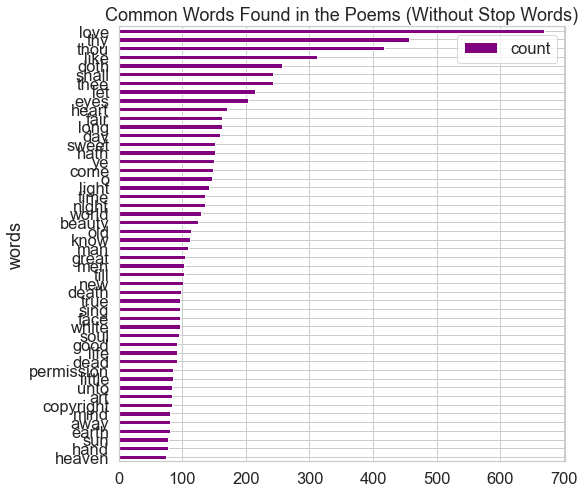

In [29]:
import matplotlib.pyplot as plt

clean_sentences = pd.DataFrame(counts_no_stopwords.most_common(50),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_sentences.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in the Poems (Without Stop Words)")

plt.show()

In [33]:
comment_words = ' '
for i in range(len(sent_list)):
    for j in range(len(sent_list[i])):
        comment_words = comment_words + sent_list[i][j] + ' '         

In [34]:
from wordcloud import WordCloud

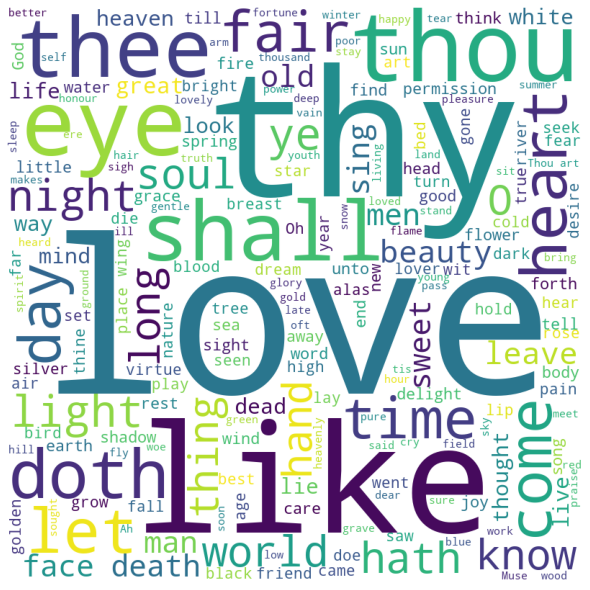

In [35]:
wordcloud = WordCloud(width = 800, height = 800, 
background_color ='white', 
stopwords = stopwords, 
min_font_size = 10).generate(comment_words) 

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [36]:
cnt_vectorizer = CountVectorizer()
features = cnt_vectorizer.fit_transform(s)
features_nd = features.toarray()

In [37]:
df_subset = pd.DataFrame({"age": df['age'], "type": df['type'], "Noun_count":df['noun_count'], 
                                  "Verb_count":df['verb_count'], "Adjective_count":df['adjective_count']})

In [38]:
df_subset = pd.get_dummies(df_subset)

In [39]:
Final = np.column_stack((features_nd,df_subset))

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test  = train_test_split(Final, author_list, train_size=0.75,random_state=1234)

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [43]:
clf1 = MultinomialNB()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.1736111111111111

In [44]:
from sklearn.svm import SVC
clf2 =SVC()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.18055555555555555

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5208333333333334

In [46]:
df['type'].unique()

array(['Mythology & Folklore', 'Nature', 'Love'], dtype=object)

In [47]:
df['author'].unique()

array(['WILLIAM SHAKESPEARE', 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH',
       'THOMAS BASTARD', 'EDMUND SPENSER', 'RICHARD BARNFIELD',
       'SIR WALTER RALEGH', 'QUEEN ELIZABETH I', 'JOHN DONNE',
       'JOHN SKELTON', 'CHRISTOPHER MARLOWE', 'LADY MARY WROTH',
       'ROBERT SOUTHWELL, SJ', 'WILLIAM BYRD', 'GEORGE GASCOIGNE',
       'HENRY VIII, KING OF ENGLAND', 'SIR THOMAS WYATT', 'EN JONSON',
       'ORLANDO GIBBONS', 'THOMAS NASHE', 'SIR PHILIP SIDNEY',
       'SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX',
       'HENRY HOWARD, EARL OF SURREY', 'GEORGE CHAPMAN', 'THOMAS CAMPION',
       'ISABELLA WHITNEY', 'SAMUEL DANIEL', 'THOMAS HEYWOOD',
       'GIOVANNI BATTISTA GUARINI', 'SIR EDWARD DYER', 'THOMAS LODGE',
       'JOHN FLETCHER', 'EDGAR LEE MASTERS', 'WILLIAM BUTLER YEATS',
       'FORD MADOX FORD', 'IVOR GURNEY', 'CARL SANDBURG', 'EZRA POUND',
       'ELINOR WYLIE', 'GEORGE SANTAYANA', 'LOUISE BOGAN',
       'KENNETH SLESSOR', 'HART CRANE', 'D. H. LAWRENCE',
       'H

In [48]:
df['age'].unique()

array(['Renaissance', 'Modern'], dtype=object)

In [49]:
df_modern = df[df['age'] == 'Modern']

In [50]:
df_modern.head(10)

,author,content,poem name,age,type,noun_count,verb_count,adjective_count
315,EDGAR LEE MASTERS,"I leaned against the mantel, sick, sick,\r\nTh...",Harold Arnett,Modern,Mythology & Folklore,15282,10221,5120
316,EDGAR LEE MASTERS,I was the first fruits of the battle of Missio...,Knowlt Hoheimer,Modern,Mythology & Folklore,15301,10235,5122
317,EDGAR LEE MASTERS,I was only eight years old;\r\nAnd before I gr...,Nellie Clark,Modern,Mythology & Folklore,15314,10253,5127
318,WILLIAM BUTLER YEATS,"W. B. Yeats, Lapis Lazuli from The Poems of W....",Lapis Lazuli,Modern,Mythology & Folklore,15333,10256,5129
319,WILLIAM BUTLER YEATS,Why should I blame her that she filled my days...,No Second Troy,Modern,Mythology & Folklore,15346,10272,5141
320,FORD MADOX FORD,I \r\nGLOOM! \r\nAn October like November; \r\...,In October 1914 [Antwerp],Modern,Mythology & Folklore,15533,10395,5212
321,IVOR GURNEY,As I went up by Ovillers\r\n In mud and wate...,Ballad of the Three Spectres,Modern,Mythology & Folklore,15557,10420,5227
322,IVOR GURNEY,She was a village\r\nOf lovely knowledge\r\nTh...,I Saw England July Night,Modern,Mythology & Folklore,15591,10440,5245
323,IVOR GURNEY,"If it were not for England, who would bear\r\n...",Servitude,Modern,Mythology & Folklore,15622,10455,5253
324,IVOR GURNEY,Only the wanderer\r\n Knows England's graces...,Song [Only the wanderer],Modern,Mythology & Folklore,15627,10462,5256


In [51]:
df_modern['author'].unique()

array(['EDGAR LEE MASTERS', 'WILLIAM BUTLER YEATS', 'FORD MADOX FORD',
       'IVOR GURNEY', 'CARL SANDBURG', 'EZRA POUND', 'ELINOR WYLIE',
       'GEORGE SANTAYANA', 'LOUISE BOGAN', 'KENNETH SLESSOR',
       'HART CRANE', 'D. H. LAWRENCE', 'HUGH MACDIARMID',
       'E. E. CUMMINGS', 'LOUIS UNTERMEYER', 'WALLACE STEVENS',
       'MARJORIE PICKTHALL', 'RICHARD ALDINGTON', 'GUILLAUME APOLLINAIRE',
       'SAMUEL GREENBERG', 'STEPHEN SPENDER', 'EDITH SITWELL',
       'PAUL LAURENCE DUNBAR', 'SARA TEASDALE', 'MINA LOY',
       'MARIANNE MOORE', 'ASIL BUNTING', 'MICHAEL ANANIA',
       'ARCHIBALD MACLEISH', 'CONRAD AIKEN', 'MALCOLM COWLEY',
       'KATHERINE MANSFIELD', 'T. S. ELIOT', 'GERTRUDE STEIN',
       'JAMES JOYCE', 'KENNETH FEARING'], dtype=object)

In [52]:
modern_poetry = df_modern[['author', 'poem name']].drop_duplicates()

In [53]:
modern_poetry.head(10)

,author,poem name
315,EDGAR LEE MASTERS,Harold Arnett
316,EDGAR LEE MASTERS,Knowlt Hoheimer
317,EDGAR LEE MASTERS,Nellie Clark
318,WILLIAM BUTLER YEATS,Lapis Lazuli
319,WILLIAM BUTLER YEATS,No Second Troy
320,FORD MADOX FORD,In October 1914 [Antwerp]
321,IVOR GURNEY,Ballad of the Three Spectres
322,IVOR GURNEY,I Saw England July Night
323,IVOR GURNEY,Servitude
324,IVOR GURNEY,Song [Only the wanderer]


In [54]:
authors = df['author'].unique()

In [55]:
authors

array(['WILLIAM SHAKESPEARE', 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH',
       'THOMAS BASTARD', 'EDMUND SPENSER', 'RICHARD BARNFIELD',
       'SIR WALTER RALEGH', 'QUEEN ELIZABETH I', 'JOHN DONNE',
       'JOHN SKELTON', 'CHRISTOPHER MARLOWE', 'LADY MARY WROTH',
       'ROBERT SOUTHWELL, SJ', 'WILLIAM BYRD', 'GEORGE GASCOIGNE',
       'HENRY VIII, KING OF ENGLAND', 'SIR THOMAS WYATT', 'EN JONSON',
       'ORLANDO GIBBONS', 'THOMAS NASHE', 'SIR PHILIP SIDNEY',
       'SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX',
       'HENRY HOWARD, EARL OF SURREY', 'GEORGE CHAPMAN', 'THOMAS CAMPION',
       'ISABELLA WHITNEY', 'SAMUEL DANIEL', 'THOMAS HEYWOOD',
       'GIOVANNI BATTISTA GUARINI', 'SIR EDWARD DYER', 'THOMAS LODGE',
       'JOHN FLETCHER', 'EDGAR LEE MASTERS', 'WILLIAM BUTLER YEATS',
       'FORD MADOX FORD', 'IVOR GURNEY', 'CARL SANDBURG', 'EZRA POUND',
       'ELINOR WYLIE', 'GEORGE SANTAYANA', 'LOUISE BOGAN',
       'KENNETH SLESSOR', 'HART CRANE', 'D. H. LAWRENCE',
       'H

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
age = df['age'].unique()

In [59]:
genre = df['type'].unique()

In [60]:
df['age'].value_counts()

Renaissance    315
Modern         258
Name: age, dtype: int64

In [61]:
df['type'].value_counts()

Love                    326
Nature                  188
Mythology & Folklore     59
Name: type, dtype: int64

In [62]:
G =nx.Graph()

In [63]:
G.add_nodes_from(age)

In [64]:
G.add_nodes_from(genre)

In [65]:
G.add_nodes_from(authors)

In [66]:
G.nodes()

NodeView(('Renaissance', 'Modern', 'Mythology & Folklore', 'Nature', 'Love', 'WILLIAM SHAKESPEARE', 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH', 'THOMAS BASTARD', 'EDMUND SPENSER', 'RICHARD BARNFIELD', 'SIR WALTER RALEGH', 'QUEEN ELIZABETH I', 'JOHN DONNE', 'JOHN SKELTON', 'CHRISTOPHER MARLOWE', 'LADY MARY WROTH', 'ROBERT SOUTHWELL, SJ', 'WILLIAM BYRD', 'GEORGE GASCOIGNE', 'HENRY VIII, KING OF ENGLAND', 'SIR THOMAS WYATT', 'EN JONSON', 'ORLANDO GIBBONS', 'THOMAS NASHE', 'SIR PHILIP SIDNEY', 'SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX', 'HENRY HOWARD, EARL OF SURREY', 'GEORGE CHAPMAN', 'THOMAS CAMPION', 'ISABELLA WHITNEY', 'SAMUEL DANIEL', 'THOMAS HEYWOOD', 'GIOVANNI BATTISTA GUARINI', 'SIR EDWARD DYER', 'THOMAS LODGE', 'JOHN FLETCHER', 'EDGAR LEE MASTERS', 'WILLIAM BUTLER YEATS', 'FORD MADOX FORD', 'IVOR GURNEY', 'CARL SANDBURG', 'EZRA POUND', 'ELINOR WYLIE', 'GEORGE SANTAYANA', 'LOUISE BOGAN', 'KENNETH SLESSOR', 'HART CRANE', 'D. H. LAWRENCE', 'HUGH MACDIARMID', 'E. E. CUMMINGS', 

In [67]:
myEdges = [tuple(element) for element in df[['author','type']].values]
myEdges2 = [tuple(element) for element in df[['author', 'age']].values]
myEdges3 = [tuple(element) for element in df[['age', 'type']].values]

In [68]:
G.add_edges_from(myEdges)
G.add_edges_from(myEdges2)
G.add_edges_from(myEdges3)

In [69]:
myEdges

[('WILLIAM SHAKESPEARE', 'Mythology & Folklore'),
 ('DUCHESS OF NEWCASTLE MARGARET CAVENDISH', 'Mythology & Folklore'),
 ('THOMAS BASTARD', 'Mythology & Folklore'),
 ('EDMUND SPENSER', 'Mythology & Folklore'),
 ('RICHARD BARNFIELD', 'Mythology & Folklore'),
 ('RICHARD BARNFIELD', 'Mythology & Folklore'),
 ('SIR WALTER RALEGH', 'Mythology & Folklore'),
 ('QUEEN ELIZABETH I', 'Mythology & Folklore'),
 ('JOHN DONNE', 'Mythology & Folklore'),
 ('JOHN SKELTON', 'Mythology & Folklore'),
 ('EDMUND SPENSER', 'Mythology & Folklore'),
 ('CHRISTOPHER MARLOWE', 'Mythology & Folklore'),
 ('EDMUND SPENSER', 'Mythology & Folklore'),
 ('EDMUND SPENSER', 'Mythology & Folklore'),
 ('EDMUND SPENSER', 'Mythology & Folklore'),
 ('EDMUND SPENSER', 'Mythology & Folklore'),
 ('JOHN DONNE', 'Mythology & Folklore'),
 ('WILLIAM SHAKESPEARE', 'Mythology & Folklore'),
 ('WILLIAM SHAKESPEARE', 'Mythology & Folklore'),
 ('WILLIAM SHAKESPEARE', 'Nature'),
 ('THOMAS BASTARD', 'Nature'),
 ('THOMAS BASTARD', 'Nature'),


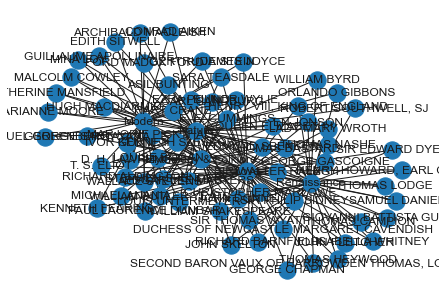

In [70]:
nx.draw_spring(G, with_labels = True)
plt.show()

In [71]:
nx.density(G)

0.07902973395931143

In [72]:
nx.number_of_nodes(G)

72

In [73]:
nx.number_of_edges(G)

202

In [74]:
nx.closeness_centrality(G)

{'Renaissance': 0.6574074074074074,
 'Modern': 0.6893203883495146,
 'Mythology & Folklore': 0.6339285714285714,
 'Nature': 0.7802197802197802,
 'Love': 0.8068181818181818,
 'WILLIAM SHAKESPEARE': 0.5144927536231884,
 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH': 0.4797297297297297,
 'THOMAS BASTARD': 0.5144927536231884,
 'EDMUND SPENSER': 0.5144927536231884,
 'RICHARD BARNFIELD': 0.4797297297297297,
 'SIR WALTER RALEGH': 0.5144927536231884,
 'QUEEN ELIZABETH I': 0.5144927536231884,
 'JOHN DONNE': 0.5144927536231884,
 'JOHN SKELTON': 0.4797297297297297,
 'CHRISTOPHER MARLOWE': 0.5144927536231884,
 'LADY MARY WROTH': 0.5071428571428571,
 'ROBERT SOUTHWELL, SJ': 0.4930555555555556,
 'WILLIAM BYRD': 0.4930555555555556,
 'GEORGE GASCOIGNE': 0.5071428571428571,
 'HENRY VIII, KING OF ENGLAND': 0.5071428571428571,
 'SIR THOMAS WYATT': 0.5071428571428571,
 'EN JONSON': 0.5071428571428571,
 'ORLANDO GIBBONS': 0.4930555555555556,
 'THOMAS NASHE': 0.5071428571428571,
 'SIR PHILIP SIDNEY': 0.507142857

In [75]:
nx.betweenness_centrality(G)

{'Renaissance': 0.14393797140276018,
 'Modern': 0.16768042613113035,
 'Mythology & Folklore': 0.07069081153588193,
 'Nature': 0.2913480885311872,
 'Love': 0.3441314553990612,
 'WILLIAM SHAKESPEARE': 4.125778773666098e-05,
 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH': 1.490424025635293e-05,
 'THOMAS BASTARD': 4.125778773666098e-05,
 'EDMUND SPENSER': 4.125778773666098e-05,
 'RICHARD BARNFIELD': 1.490424025635293e-05,
 'SIR WALTER RALEGH': 4.125778773666098e-05,
 'QUEEN ELIZABETH I': 4.125778773666098e-05,
 'JOHN DONNE': 4.125778773666098e-05,
 'JOHN SKELTON': 1.490424025635293e-05,
 'CHRISTOPHER MARLOWE': 4.125778773666098e-05,
 'LADY MARY WROTH': 1.0876067214095384e-05,
 'ROBERT SOUTHWELL, SJ': 0.0,
 'WILLIAM BYRD': 0.0,
 'GEORGE GASCOIGNE': 1.0876067214095384e-05,
 'HENRY VIII, KING OF ENGLAND': 1.0876067214095384e-05,
 'SIR THOMAS WYATT': 1.0876067214095384e-05,
 'EN JONSON': 1.0876067214095384e-05,
 'ORLANDO GIBBONS': 0.0,
 'THOMAS NASHE': 1.0876067214095384e-05,
 'SIR PHILIP SIDNEY':

In [76]:
nx.degree_centrality(G)

{'Renaissance': 0.47887323943661975,
 'Modern': 0.5492957746478874,
 'Mythology & Folklore': 0.4225352112676056,
 'Nature': 0.7183098591549296,
 'Love': 0.7605633802816901,
 'WILLIAM SHAKESPEARE': 0.056338028169014086,
 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH': 0.04225352112676056,
 'THOMAS BASTARD': 0.056338028169014086,
 'EDMUND SPENSER': 0.056338028169014086,
 'RICHARD BARNFIELD': 0.04225352112676056,
 'SIR WALTER RALEGH': 0.056338028169014086,
 'QUEEN ELIZABETH I': 0.056338028169014086,
 'JOHN DONNE': 0.056338028169014086,
 'JOHN SKELTON': 0.04225352112676056,
 'CHRISTOPHER MARLOWE': 0.056338028169014086,
 'LADY MARY WROTH': 0.04225352112676056,
 'ROBERT SOUTHWELL, SJ': 0.028169014084507043,
 'WILLIAM BYRD': 0.028169014084507043,
 'GEORGE GASCOIGNE': 0.04225352112676056,
 'HENRY VIII, KING OF ENGLAND': 0.04225352112676056,
 'SIR THOMAS WYATT': 0.04225352112676056,
 'EN JONSON': 0.04225352112676056,
 'ORLANDO GIBBONS': 0.028169014084507043,
 'THOMAS NASHE': 0.04225352112676056,
 'S

In [77]:
cross_tab = pd.crosstab(df['age'],df['type'],margins=True)



In [78]:
print(cross_tab)

type         Love  Mythology & Folklore  Nature  All
age                                                 
Modern         83                    40     135  258
Renaissance   243                    19      53  315
All           326                    59     188  573


<AxesSubplot:xlabel='age'>

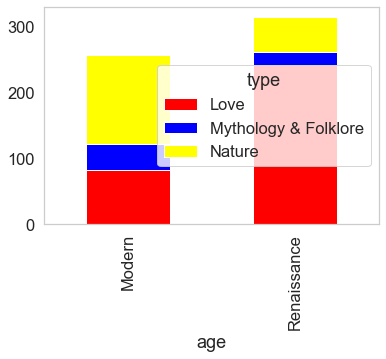

In [79]:
%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue', 'yellow'], grid=False)

In [80]:
cross_tab2 = pd.crosstab(df['author'],df['type'],margins=True)
print(cross_tab2)

type                  Love  Mythology & Folklore  Nature  All
author                                                       
ARCHIBALD MACLEISH       0                     0       7    7
ASIL BUNTING             1                     0       2    3
CARL SANDBURG            3                     2      11   16
CHRISTOPHER MARLOWE      4                     1       1    6
CONRAD AIKEN             0                     0       3    3
...                    ...                   ...     ...  ...
WALLACE STEVENS          2                     1      11   14
WILLIAM BUTLER YEATS    13                     2      11   26
WILLIAM BYRD             0                     0       1    1
WILLIAM SHAKESPEARE     52                     3      16   71
All                    326                    59     188  573

[68 rows x 4 columns]


<AxesSubplot:xlabel='author'>

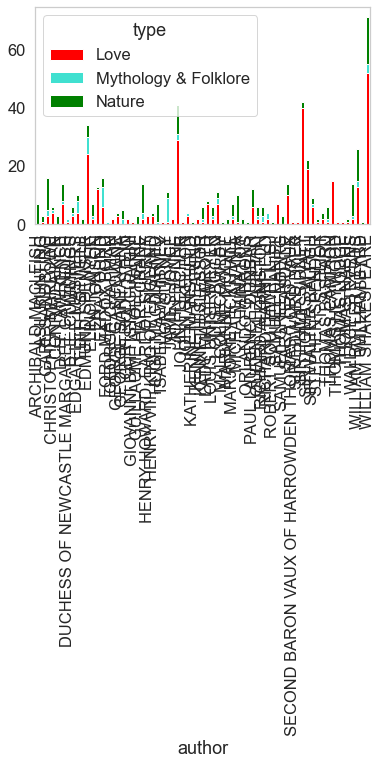

In [81]:
%matplotlib inline
cross_tab2.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','turquoise', 'green'], grid=False)